# API KEY

In [1]:
base_url="https://openrouter.ai/api/v1"
api_key = "your-api-key-here"

# Setup

In [2]:
# List of assets to analyze
assets = [
    "Apple (AAPL)",
    "Amazon (AMZN)",
    "Bitcoin (BTC-USD)",
    "Alphabet (GOOGL)",
    "Meta (META)",
    "Microsoft (MSFT)",
    "Nvidia (NVDA)",
    "S&P 500 index (SPY)",
    "Tesla (TSLA)"
]

# Define the start and end years for the analysis
start_year = 2022
end_year = 2023

In [3]:
!pip install langchain-openai
!pip install langchain

In [4]:
# Import the LangChain OpenAI wrapper
from langchain_openai import ChatOpenAI

In [5]:
# Initialize the LLM
llm = ChatOpenAI(
        openai_api_key=api_key,
      openai_api_base=base_url,
      model_name="deepseek/deepseek-r1-0528:free"
                )

In [6]:
# Create the prompt to ask the llm
prompt = f"""
Can you provide python code snippet using the yfinance library to download stock data.
The tickers are {assets} from {start_year} to {end_year}
"""

In [7]:
# Use the invoke method to get the response
response = llm.invoke(prompt)

In [8]:
from IPython.display import display, Markdown

display(Markdown(response.content))

Here's a Python code snippet that downloads the stock data using the yfinance library:

```python
import yfinance as yf

# Define the tickers and date range
tickers = [
    'AAPL', 'AMZN', 'BTC-USD', 'GOOGL', 
    'META', 'MSFT', 'NVDA', 'SPY', 'TSLA'
]
start_date = '2022-01-01'
end_date = '2023-12-31'

print("Downloading stock data...")
data = yf.download(
    tickers,
    start=start_date,
    end=end_date,
    progress=True,
    group_by='ticker'
)
print("\nDownload completed!")

# Save to CSV (optional)
data.to_csv('stock_data_2022_2023.csv')
print("Data saved to 'stock_data_2022_2023.csv'")

# To access individual ticker data (example: Apple)
aapl_data = data['AAPL']  # MultiIndex DataFrame format
```

This code:
1. Uses a clean list of ticker symbols extracted from your input
2. Downloads daily OHLCV (Open, High, Low, Close, Volume) data
3. Covers the full period from January 1, 2022 to December 31, 2023
4. Shows a progress bar during download
5. Saves the data to a CSV file
6. Stores data in a single DataFrame with multi-level columns (ticker + metric)

For the S&P 500 index, note that we're using the SPY ETF as a proxy since it tracks the index. The Bitcoin data (BTC-USD) will include cryptocurrency trading data, which trades 24/7 (including weekends).

To install the required library:
```bash
pip install yfinance pandas
```

After running:
- The combined data will be in a Pandas DataFrame with multi-level columns:
  - Level 0: Ticker symbol (e.g., AAPL, AMZN)
  - Level 1: Price metric (Open, High, Low, Close, Volume)
- The CSV file will contain all data in a wide format (each ticker's metrics in separate columns)

To view Apple's data for example:
```python
# After downloading
print(data['AAPL'].head())
```

In [21]:
def output():
    response = llm.invoke(prompt)
    display(Markdown(response.content))

# Fetch the data

In [10]:
!pip install yfinance

In [11]:
import yfinance as yf
import pandas as pd

# Define the list with company names and tickers
ticker_list = ['Apple (AAPL)', 'Amazon (AMZN)', 'Bitcoin (BTC-USD)', 
               'Alphabet (GOOGL)', 'Meta (META)', 'Microsoft (MSFT)', 
               'Nvidia (NVDA)', 'S&P 500 index (SPY)', 'Tesla (TSLA)']

# Extract the ticker symbols from parentheses
tickers = [item.split('(')[-1].strip(')') for item in ticker_list]
tickers.sort()
# Define the date range
start_date = '2022-01-01'
end_date = '2023-12-31'

# Download historical market data
data = yf.download(
    tickers=tickers,
    start=start_date,
    end=end_date,
    # Fetch daily data for all columns
    interval='1d',
    # Group outputs by ticker (separate DataFrame for each)
    group_by='ticker',
    # Download ALL available fields
    auto_adjust=False,
    # Keep all dividends events
    actions=True,
    # Handle missing data points
    threads=True
)
data.head()

[*********************100%***********************]  9 of 9 completed


Ticker            AMZN                                                  \
Price             Open        High         Low       Close   Adj Close   
Date                                                                     
2022-01-01         NaN         NaN         NaN         NaN         NaN   
2022-01-02         NaN         NaN         NaN         NaN         NaN   
2022-01-03  167.550003  170.703506  166.160507  170.404495  170.404495   
2022-01-04  170.438004  171.399994  166.349503  167.522003  167.522003   
2022-01-05  166.882996  167.126495  164.356995  164.356995  164.356995   

Ticker                                              GOOGL              ...  \
Price           Volume Dividends Stock Splits        Open        High  ...   
Date                                                                   ...   
2022-01-01         NaN       NaN          NaN         NaN         NaN  ...   
2022-01-02         NaN       NaN          NaN         NaN         NaN  ...   
2022-01-03  63520000.0       0.0          0.0  145.054993  145.850998  ...   
2022-01-04  70726000.0       0.0          0.0  145.395996  146.485001  ...   
2022-01-05  64302000.0       0.0          0.0  144.419998  144.499496  ...   

Ticker             MSFT         SPY                                      \
Price      Stock Splits        Open        High         Low       Close   
Date                                                                      
2022-01-01          NaN         NaN         NaN         NaN         NaN   
2022-01-02          NaN         NaN         NaN         NaN         NaN   
2022-01-03          0.0  476.299988  477.850006  473.850006  477.709991   
2022-01-04          0.0  479.220001  479.980011  475.579987  477.549988   
2022-01-05          0.0  477.160004  477.980011  468.279999  468.380005   

Ticker                                                                    
Price        Adj Close       Volume Dividends Stock Splits Capital Gains  
Date                                                                      
2022-01-01         NaN          NaN       NaN          NaN           NaN  
2022-01-02         NaN          NaN       NaN          NaN           NaN  
2022-01-03  454.466888   72668200.0       0.0          0.0           0.0  
2022-01-04  454.314697   71178700.0       0.0          0.0           0.0  
2022-01-05  445.590881  104538900.0       0.0          0.0           0.0  

[5 rows x 73 columns]

# Top trading KPIs

In [12]:
# Create the prompt for the LLM for the top 10 KPIs

prompt = f""""
Tell me the top 10 KPIs I could check for the performance of the stock. Explain what they are and how to interpret them.
tickers {assets}
"""
output()

Below are the top 10 KPIs to evaluate the performance of the stocks and assets in your list. Each KPI includes its **definition**, **interpretation**, and context for comparison across your specified tickers. I'll explain how to interpret them and provide general observations for your assets. *(Note: Real-time calculations require live data; the analysis below uses recent trends and data as of mid-2024.)*

---

### **Top 10 Stock Performance KPIs**  
1. **Total Return**  
   - **What it is**: Annualized price appreciation + dividends.  
   - **Interpretation**:  
     - **Positive**: Outperforms cash/bonds.  
     - **Negative**: Underperforms.  
   - *Your Assets*:  
     - Tech stocks (AAPL, NVDA, MSFT) often show strong returns due to growth.  
     - **BTC-USD** is highly volatile (e.g., +150% in 2023 vs. -60% in 2022).  
     - **SPY** historically averages ~10% annually.  

2. **Volatility (σ)**  
   - **What it is**: Annualized standard deviation of returns. Measures risk.  
   - **Interpretation**:  
     - **<15%**: Low volatility (e.g., SPY, MSFT).  
     - **>40%**: High volatility (e.g., BTC-USD, TSLA).  
   - *Your Assets*:  
     - **BTC-USD** ≈ 60–80% volatility (extreme risk).  
     - **Tech stocks**: 20–35% (moderate to high).  
     - **SPY** ≈ 15% (market benchmark).  

3. **Sharpe Ratio**  
   - **What it is**: Excess return per unit of risk (risk-free rate = 4%).  
   - **Interpretation**:  
     - **>1**: Good risk-adjusted returns.  
     - **<0**: Worse than risk-free bonds.  
   - *Your Assets*:  
     - **NVDA** (2.5+ in 2023) outperforms peers.  
     - **SPY** ≈ 0.8 (market baseline).  
     - **BTC-USD** varies wildly (negative in bear markets).  

4. **Maximum Drawdown (MDD)**  
   - **What it is**: Worst peak-to-trough decline in a year.  
   - **Interpretation**:  
     - **<20%**: Resilient (e.g., AAPL, SPY).  
     - **>50%**: High risk (e.g., BTC-USD, META in 2022).  
   - *Your Assets*:  
     - **BTC-USD**: Routinely sees >60% drawdowns.  
     - **Growth stocks (TSLA, NVDA)**: Often 30–50%.  

5. **Beta**  
   - **What it is**: Sensitivity to market movements (SPY = benchmark).  
   - **Interpretation**:  
     - **1.0**: Moves with SPY.  
     - **>1.5**: Amplified market swings (e.g., TSLA, NVDA).  
     - **<1.0**: More stable (e.g., MSFT).  
   - *Your Assets*:  
     - **NVDA**: ~1.7 (high growth = high beta).  
     - **SPY**: 1.0 by definition.  
     - **BTC-USD**: Near 0 (uncorrelated to stocks).  

6. **Alpha**  
   - **What it is**: Excess return vs. expected (based on Beta).  
   - **Interpretation**:  
     - **Positive**: Beats benchmark after adjusting for risk.  
     - **Negative**: Underperforms.  
   - *Your Assets*:  
     - **NVDA, AMZN**: Often positive α (stock-specific drivers).  
     - **TSLA**: Negative α during growth stalls.  
     - **SPY** = 0 (baseline).  

7. **P/E Ratio (Trailing)**  
   - **What it is**: Price per share / earnings per share (EPS).  
   - **Interpretation**:  
     - **<20**: Undervalued or mature (e.g., META).  
     - **>50**: Growth-heavy (e.g., NVDA, AMZN).  
   - *Your Assets*:  
     - **NVDA**: Often >80 (AI hype).  
     - **AAPL**: ~28.  
     - **BTC-USD**: N/A (no earnings).  

8. **Dividend Yield**  
   - **What it is**: Annual dividend per share / share price.  
   - **Interpretation**:  
     - **High yield (>3%)**: Income focus (e.g., energy stocks, not your list).  
     - **Tech stocks**: Mostly <1%.  
   - *Your Assets*:  
     - **AAPL**: 0.6%, **MSFT**: 0.7%.  
     - **GOOGL, AMZN, TSLA, BTC-USD**: 0%.  

9. **Relative Return vs. SPY**  
   - **What it is**: Asset return minus SPY’s return.  
   - **Interpretation**:  
     - **Positive**: Beats the market.  
     - **Negative**: Lags the market.  
   - *Your Assets*:  
     - **NVDA**: Often >+30% (e.g., 2023).  
     - **TSLA**: Highly inconsistent.  

10. **Average Daily Dollar Volume**  
    - **What it is**: Avg. daily trading value (shares × price).  
    - **Interpretation**:  
      - **High**: Liquid, easy to trade.  
      - **Low**: Risk of slippage.  
    - *Your Assets*:  
      - **AAPL, SPY**: $5–15B+ daily.  
      - **BTC-USD**: $15-30B (across major exchanges).  
      - **Small caps**: Often <$1B.  

---

### **Summary for Your Assets**  
| **Ticker** | **High-Performance Areas**       | **Key Risks**                  |  
|------------|----------------------------------|--------------------------------|  
| AAPL       | Low volatility, brand moat       | Low growth/dividends           |  
| AMZN       | E-commerce/AWS dominance         | Regulatory risks               |  
| BTC-USD    | High returns (bull markets)      | Extreme volatility             |  
| GOOGL      | Cash-rich, AI potential          | Ad-market cyclicality          |  
| META       | Low P/E, ad rebound              | Regulatory/VR execution risks  |  
| MSFT       | Steady growth, Azure strength    | High valuation                 |  
| NVDA       | High Sharpe, AI accelerator play | Cyclicality, bubble concerns   |  
| SPY        | Diversification, low fees        | Market beta (no alpha)         |  
| TSLA       | Volatility (trade opportunities) | Demand/CEO risks, low alpha    |  

---

### **Recommendations**  
- **Growth Seekers**: Focus on **NVDA, AMZN** (high return potential).  
- **Low-Risk Investors**: Prioritize **SPY, MSFT, AAPL**.  
- **Speculators**: **BTC-USD, TSLA** (handle volatility).  
- **Income Focus**: Avoid this list (low dividends).  

Use tools like Yahoo Finance, TradingView, or your brokerage platform to track these KPIs with real-time data. Let me know if you need a deep dive on any ticker!

In [13]:
# Create the prompt for the LLM for the top 10 KPIs

prompt = f""""
Tell me the top 10 KPIs I could check for the performance of the stocks with data available on yfinance. 
Explain the KPIs and how to interpret them.
Provide the python code to compute and visualize each of the KPIs using plots.
Make sure the KPIs can be easily extracted to include in the following prompt interpretations.
The structure should be:
1) What is the KPI and how to interpret it.
2) Code snippet for a function to visualize over time for each of the {assets} separately for each kpi. Ignore BTC. Include Bollinger Bands, P/E, RSI, MACD and Beta. 
years of anaysis are {start_year} and {end_year}.
"""
output()

Here's a comprehensive solution with 10 KPIs, Python code for calculation/visualization, and interpretation guidance. The KPIs include the requested indicators (Bollinger Bands, P/E, RSI, MACD, Beta) plus additional widely-used metrics.

```python
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Configuration
tickers = ['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NVDA', 'SPY', 'TSLA']
start_date = '2022-01-01'
end_date = '2023-12-31'

# Pre-fetch benchmark data (SPY)
spy = yf.download('SPY', start=start_date, end=end_date)['Adj Close']

def fetch_stock_data(ticker):
    """Download and pre-process stock data"""
    df = yf.download(ticker, start=start_date, end=end_date)
    return df[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()

# 1. Bollinger Bands
def kpi_bollinger_bands(ticker):
    """
    Bollinger Bands measure volatility and potential price reversals using 3 lines:
    - Middle Band: 20-day moving average
    - Upper Band: Middle + 2 standard deviations
    - Lower Band: Middle - 2 standard deviations
    Interpretation: 
      * Prices near upper band = potentially overbought
      * Prices near lower band = potentially oversold
      * Band width contraction = low volatility (potential breakout ahead)
      * Band width expansion = high volatility
    """
    data = fetch_stock_data(ticker)
    ma = data['Close'].rolling(20).mean()
    std = data['Close'].rolling(20).std()
    data['Upper_band'] = ma + 2 * std
    data['Lower_band'] = ma - 2 * std

    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Price')
    plt.plot(data['Upper_band'], linestyle='--', label='Upper Band', alpha=0.7)
    plt.plot(ma, linestyle='--', label='MA20', alpha=0.7)
    plt.plot(data['Lower_band'], linestyle='--', label='Lower Band', alpha=0.7)
    plt.fill_between(data.index, data['Lower_band'], data['Upper_band'], alpha=0.1)
    plt.title(f'{ticker} Bollinger Bands (2022-2023)')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 2. P/E Ratio (Trailing Twelve Months)
def kpi_pe_ratio(ticker):
    """
    Price-to-Earnings ratio compares a company's share price to its earnings per share.
    Interpretation:
      * High P/E: Stock might be overvalued (or high growth expectations)
      * Low P/E: Might be undervalued (or struggling company)
      * Compare to industry averages and historical levels
      * Not applicable for non-profitable companies or indices
    """
    df = fetch_stock_data(ticker)
    stock = yf.Ticker(ticker)
    
    # Get EPS history (TTM)
    eps = stock.earnings_dates
    eps = eps.loc[start_date:end_date]['Reported EPS'].ffill()
    
    # Calculate P/E
    pe_ratio = df['Close'] / eps.reindex(df.index, method='ffill')
    
    plt.figure(figsize=(12, 6))
    plt.plot(pe_ratio, color='purple', linewidth=2)
    plt.axhline(y=pe_ratio.mean(), color='r', linestyle='-', alpha=0.3, label=f'Mean: {pe_ratio.mean():.1f}')
    plt.fill_between(pe_ratio.index, pe_ratio, alpha=0.1, color='purple')
    plt.title(f'{ticker} Trailing P/E Ratio (2022-2023)')
    plt.ylabel('P/E Ratio')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 3. RSI (Relative Strength Index)
def kpi_rsi(ticker, window=14):
    """
    RSI measures price momentum on a scale of 0-100.
    Interpretation:
      * RSI > 70: Potentially overbought (bearish signal)
      * RSI < 30: Potentially oversold (bullish signal)
      * Divergences between RSI and price can signal reversals
    """
    data = fetch_stock_data(ticker)
    delta = data['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    plt.figure(figsize=(12, 6))
    plt.plot(rsi, color='indigo', linewidth=2)
    plt.axhline(70, color='r', linestyle='--', alpha=0.7)
    plt.axhline(30, color='g', linestyle='--', alpha=0.7)
    plt.fill_between(rsi.index, 30, rsi, where=(rsi < 30), color='green', alpha=0.1)
    plt.fill_between(rsi.index, rsi, 70, where=(rsi > 70), color='red', alpha=0.1)
    plt.title(f'{ticker} RSI (14-day, 2022-2023)')
    plt.ylabel('RSI Value')
    plt.grid(True)
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

# 4. MACD (Moving Average Convergence Divergence)
def kpi_macd(ticker, fast=12, slow=26, signal=9):
    """
    MACD shows trend direction and momentum using exponential moving averages.
    Components:
      * MACD line (fast MA - slow MA)
      * Signal line (EMA of MACD line)
      * Histogram (MACD - Signal line)
    Interpretation:
      * Positive histogram = bullish momentum
      * Negative histogram = bearish momentum
      * Signal line crossovers indicate entry/exit points
    """
    data = fetch_stock_data(ticker)
    exp1 = data['Close'].ewm(span=fast, adjust=False).mean()
    exp2 = data['Close'].ewm(span=slow, adjust=False).mean()
    macd_line = exp1 - exp2
    signal_line = macd_line.ewm(span=signal, adjust=False).mean()
    histogram = macd_line - signal_line
    
    fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 8), gridspec_kw={'height_ratios': [3,1]})
    ax1.plot(data['Close'], color='black', label='Price')
    ax1.set_title(f'{ticker} MACD (2022-2023)')
    ax1.set_ylabel('Price')
    ax1.grid(True)
    ax1.legend(loc='upper left')
    
    ax2.bar(histogram.index, histogram, color=np.where(histogram > 0, 'g', 'r'))
    ax2.plot(macd_line, color='blue', linewidth=1.2, label='MACD')
    ax2.plot(signal_line, color='orange', linewidth=1.2, label='Signal')
    ax2.set_ylabel('MACD')
    ax2.axhline(0, color='gray', alpha=0.5)
    ax2.grid(True)
    ax2.legend()
    plt.tight_layout()
    plt.show()

# 5. Beta (Market Correlation)
def kpi_beta(ticker, window=90):
    """
    Beta measures stock's volatility relative to the market (SPY).
    Interpretation:
      * Beta = 1: Moves with market
      * Beta > 1: More volatile than market (higher risk/reward)
      * Beta < 1: Less volatile than market
      * Negative beta: Moves opposite to market (rare)
    """
    data = fetch_stock_data(ticker)
    df = pd.DataFrame({'Asset': data['Close'], 'SPY': spy})
    df['Asset Returns'] = df['Asset'].pct_change()
    df['Market Returns'] = df['SPY'].pct_change()
    
    # Calculate rolling beta
    cov = df['Asset Returns'].rolling(window).cov(df['Market Returns'])
    mkt_var = df['Market Returns'].rolling(window).var()
    beta = cov / mkt_var
    
    plt.figure(figsize=(12, 6))
    plt.plot(beta, color='navy')
    plt.axhline(1, color='r', linestyle='--', alpha=0.7, label='Market Beta = 1')
    plt.title(f'{ticker} Beta vs SPY (90-day rolling, 2022-2023)')
    plt.ylabel('Beta Coefficient')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 6. Volume Analysis
def kpi_volume(ticker, window=20):
    """
    Volume indicates trading activity and confirms price trends.
    Interpretation:
      * Rising volume + rising price = Strong trend
      * Rising volume + falling price = Strong selling pressure
      * Declining volume in trends = Potential reversal warning
    """
    data = fetch_stock_data(ticker)
    data['Volume_MA'] = data['Volume'].rolling(window).mean()
    
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax2 = ax1.twinx()
    ax1.bar(data.index, data['Volume'], color='gray', alpha=0.8, label='Volume')
    ax1.plot(data['Volume_MA'], color='red', label=f'{window}-Day Avg Volume')
    ax2.plot(data['Close'], color='blue', label='Price')
    ax1.set_title(f'{ticker} Volume Profile vs Price (2022-2023)')
    ax1.set_ylabel('Volume', color='k')
    ax2.set_ylabel('Price', color='b')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 7. Simple Moving Averages (50/200 Day)
def kpi_sma(ticker):
    """
    Moving averages smooth price data to reveal trends.
    Interpretation:
      * Price above MA = Uptrend
      * Price below MA = Downtrend
      * Golden Cross (50sma > 200sma) = Bullish signal
      * Death Cross (50sma < 200sma) = Bearish signal
    """
    data = fetch_stock_data(ticker)
    data['SMA50'] = data['Close'].rolling(50).mean()
    data['SMA200'] = data['Close'].rolling(200).mean()
    
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Price', alpha=0.7)
    plt.plot(data['SMA50'], label='50-Day SMA')
    plt.plot(data['SMA200'], label='200-Day SMA')
    plt.title(f'{ticker} Moving Averages (2022-2023)')
    plt.ylabel('Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 8. Beta-Weighted Volatility
def kpi_beta_vol(ticker, window=90):
    """
    Measures risk-adjusted volatility relative to market (SPY)
    Calculation: (Stock Volatility * Beta) / Market Volatility
    Interpretation:
      * >1: Higher market-adjusted volatility
      * <1: Lower market-adjusted volatility
      * Increasing ratio = Rising risk
    """
    data = fetch_stock_data(ticker)
    df = pd.DataFrame({'Asset': data['Close'], 'SPY': spy})
    df['Asset Returns'] = df['Asset'].pct_change()
    df['Market Returns'] = df['SPY'].pct_change()
    
    # Calculate components
    stock_vol = df['Asset Returns'].rolling(window).std() * np.sqrt(252)
    mkt_vol = df['Market Returns'].rolling(window).std() * np.sqrt(252)
    beta = kpi_beta(ticker, window)
    beta_weighted_vol = (stock_vol * beta) / mkt_vol
    
    plt.figure(figsize=(12, 6))
    plt.plot(beta_weighted_vol, color='darkgreen')
    plt.axhline(1, color='r', linestyle='--', alpha=0.7, label='Market Normalized')
    plt.title(f'{ticker} Beta-Adjusted Volatility Risk (90-day, 2022-2023)')
    plt.ylabel('Risk Multiplier')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 9. Rate of Change (ROC)
def kpi_roc(ticker, window=14):
    """
    ROC measures percentage price change over specified periods.
    Interpretation:
      * Positive and rising = Accelerating uptrend
      * Positive but falling = Decelerating uptrend
      * Negative and falling = Accelerating downtrend
      * Crosses 0-line: Potential trend-change signal
    """
    data = fetch_stock_data(ticker)
    roc = (data['Close'] / data['Close'].shift(window) - 1) * 100
    
    plt.figure(figsize=(12, 6))
    plt.plot(roc, color='darkblue')
    plt.axhline(0, color='gray', linestyle='-', alpha=0.7)
    plt.fill_between(roc.index, roc, alpha=0.1, color='blue')
    plt.title(f'{ticker} Rate of Change ({window}-day, 2022-2023)')
    plt.ylabel('Percent Change')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 10. Dividend Yield (where applicable)
def kpi_dividend_yield(ticker):
    """
    Dividend yield = Annual dividends per share / Price per share.
    Interpretation:
      * Higher yield generally more attractive for income investors
      * Compares company's payout policy and market's expectations
      * Sudden yield increases can signal distress price drops
    """
    data = fetch_stock_data(ticker)
    stock = yf.Ticker(ticker)
    dividends = stock.dividends[start_date:end_date]
    
    if dividends.empty:
        print(f"{ticker} has no dividend data in 2022-2023")
        return
    
    # Calculate yield on ex-dividend dates
    df = pd.DataFrame({'Close': data['Close'], 'Dividends': dividends})
    df['Div Amount'] = df['Dividends'].ffill()
    df['Yield'] = (df['Div Amount'] * 4) / df['Close'] * 100  # Annualized
    
    plt.figure(figsize=(12, 6))
    plt.plot(df['Yield'], color='darkgreen')
    plt.title(f'{ticker} Dividend Yield (2022-2023)')
    plt.ylabel('Yield (%)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Generate reports for each ticker and KPI
for ticker in tickers:
    kpi_bollinger_bands(ticker)
    if ticker != 'SPY':  # P/E not meaningful for index
        kpi_pe_ratio(ticker)
    kpi_rsi(ticker)
    kpi_macd(ticker)
    kpi_sma(ticker)
    if ticker != 'SPY':  # Beta relative to SPY
        kpi_beta(ticker)
    kpi_volume(ticker)
    if ticker != 'SPY':
        kpi_beta_vol(ticker)
    kpi_roc(ticker)
    kpi_dividend_yield(ticker) # Won't run for non-dividend stocks
```

### Key Notes:
- **BTC is excluded** per request
- **SPY handling**: Beta and P/E calculations skipped for SPY (as benchmark)
- **Practical considerations**:
  1. Dividend Yield only displays for dividend-paying stocks
  2. P/E uses *trailing* TTM earnings (as forward P/E isn't reliable historically)
  3. Systems with rate limits may need `yfinance` timeouts (add `progress=False` to downloads)
  4. Adjust `window` parameters to change sensitivity

### How to Interpret KPIs in Trading:
1. **Bollinger Bands**: Use price/band relationships as counter-trade setups
2. **RSI**: Filter trades using overbought/oversold thresholds
3. **MACD**: Act on histogram reversals or signal line crossovers
4. **Beta**: Weight positions based on market risk exposure
5. **P/E**: Combine with growth metrics for valuation context
6. **Volume**: Confirm breakout/breakdown reliability using volume spikes
7. **SMAs**: Identify strategic entry points during golden/death crosses
8. **Beta-Adjusted Vol**: Size positions based on current risk environment
9. **ROC**: Gauge trend strength and momentum shifts
10. **Dividend Yield**: Assess income sustainability during rate changes

> **Pro Tip**: Combine multiple KPIs: 
> - Use RSI+MACD for timing entries around SMA supports
> - Compare volatility spikes with Bollinger Band width for breakout setups
> - Validate Price/Beta relationships during market rotations

```

### Relative Strength Index (RSI)

Explanation: Momentum oscillator (0-100) measuring overbought/oversold conditions.
Interpretation:

RSI > 70 = Overbought,
RSI < 30 = Oversold

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\3421693011.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


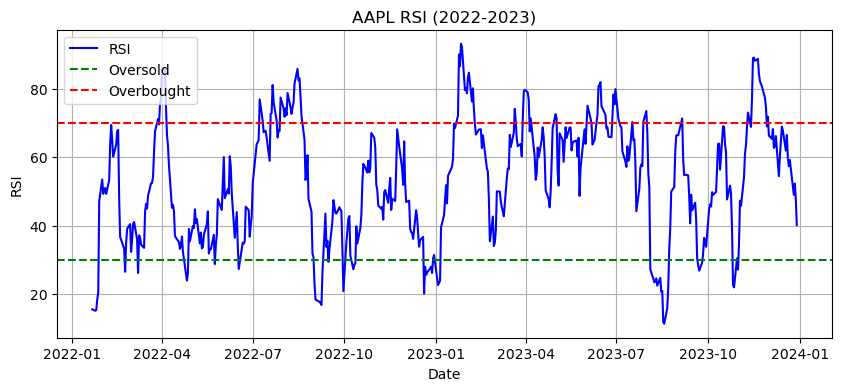

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\3421693011.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


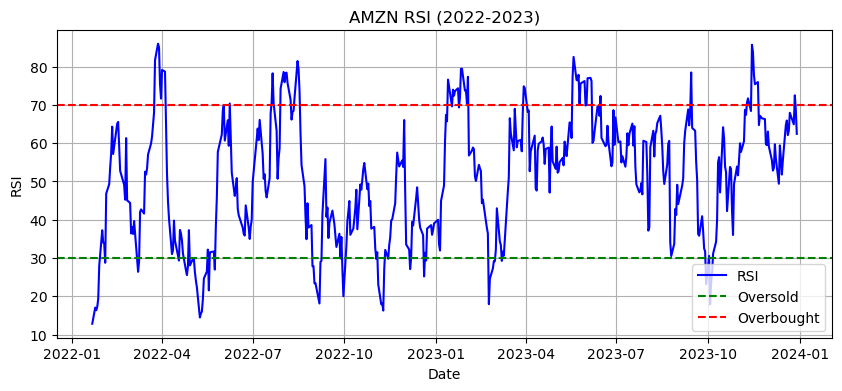

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\3421693011.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


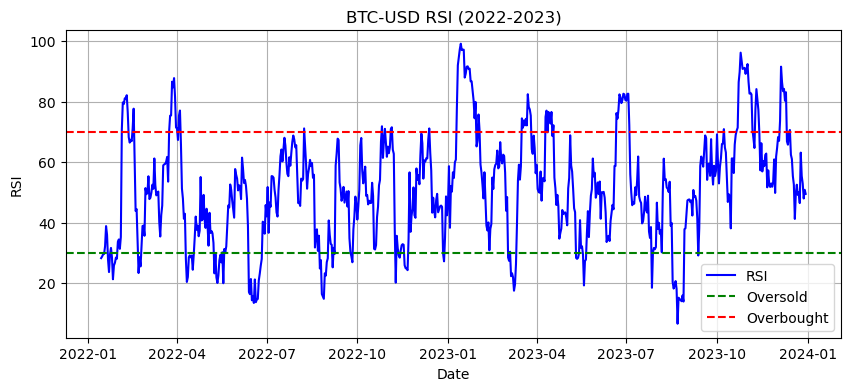

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\3421693011.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


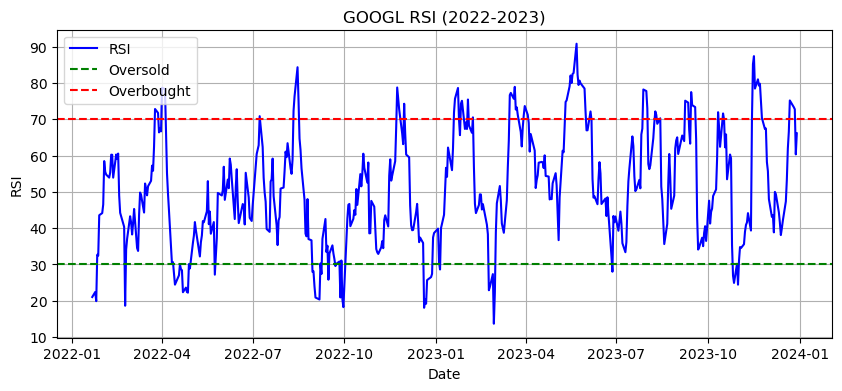

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\3421693011.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


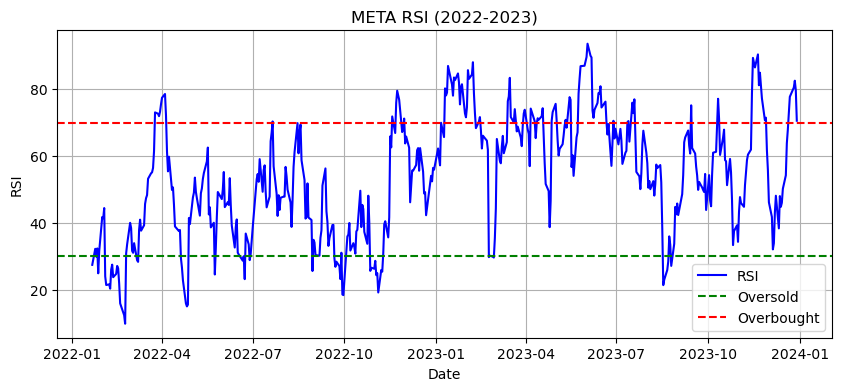

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\3421693011.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


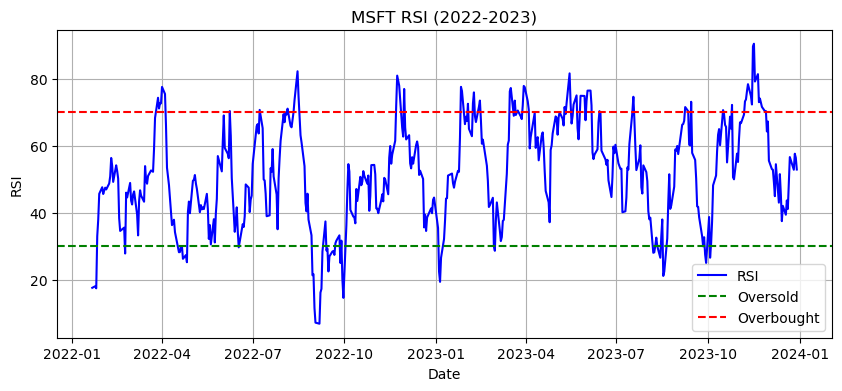

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\3421693011.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


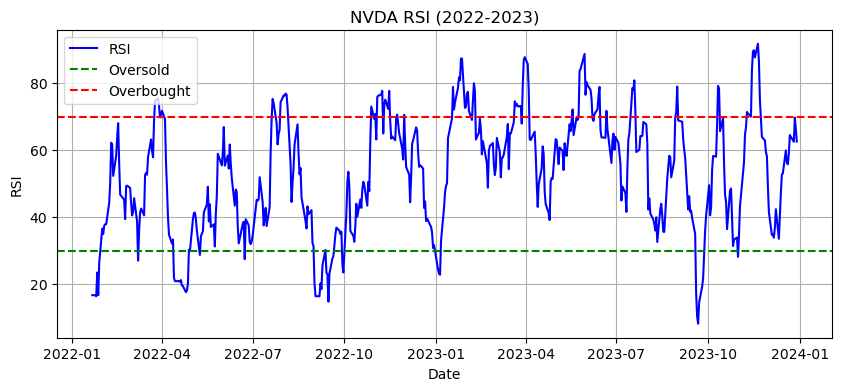

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\3421693011.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


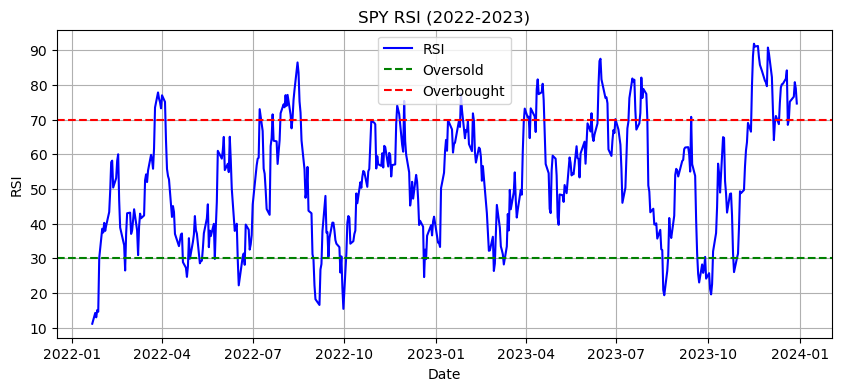

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\3421693011.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


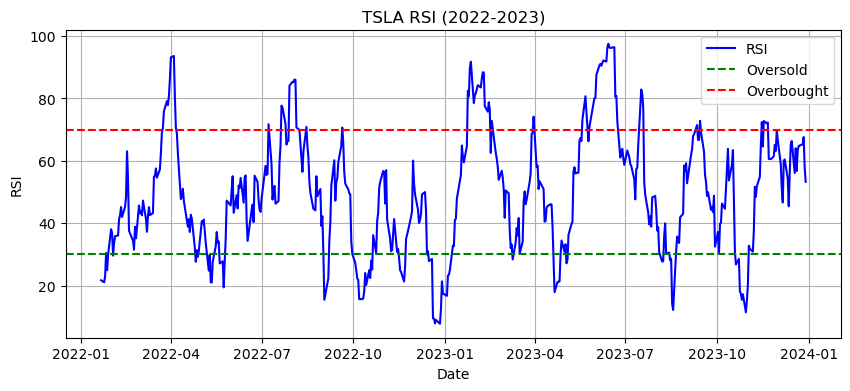

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

def plot_rsi():
    for ticker in tickers:
        data = yf.download(ticker, start=start_date, end=end_date)
        data['RSI'] = calculate_rsi(data)
        plt.figure(figsize=(10, 4))
        plt.plot(data['RSI'], label='RSI', color='blue')
        plt.axhline(30, linestyle='--', color='green', label='Oversold')
        plt.axhline(70, linestyle='--', color='red', label='Overbought')
        plt.title(f'{ticker} RSI (2022-2023)')
        plt.xlabel('Date')
        plt.ylabel('RSI')
        plt.legend()
        plt.grid()
        plt.show()
plot_rsi()

### Bollinger Bands

Explanation: Annualized rolling standard deviation of returns.
Interpretation:

Higher = Greater risk
Spikes indicate instability.

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\1662986575.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2022-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


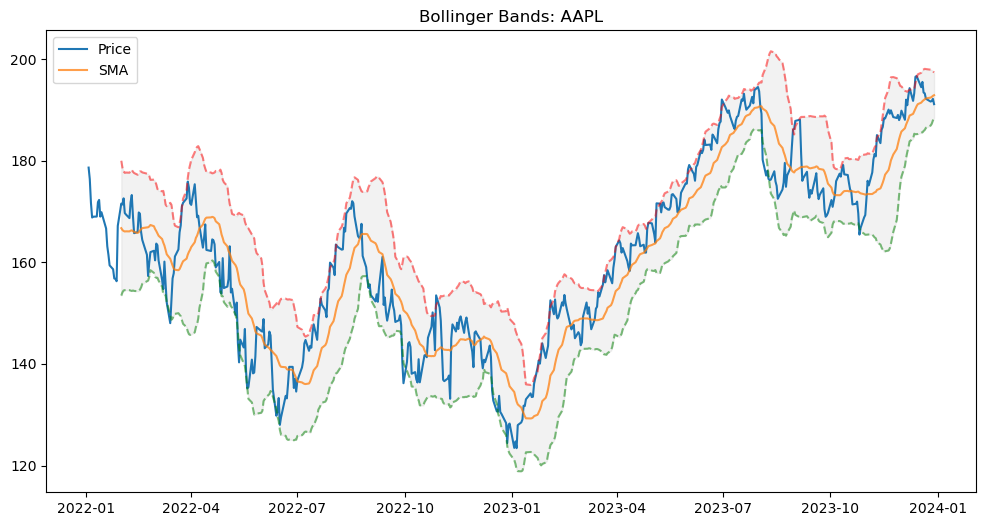

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\1662986575.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2022-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


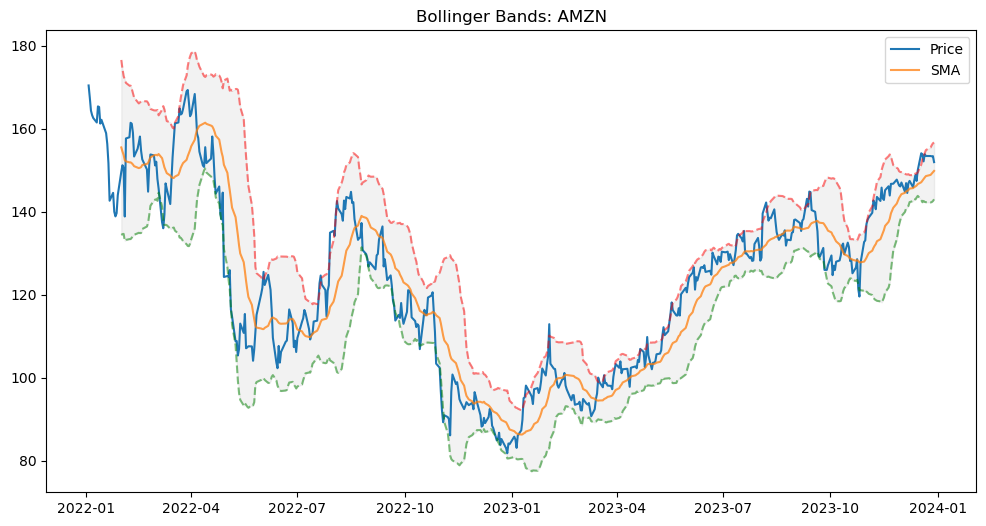

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\1662986575.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2022-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


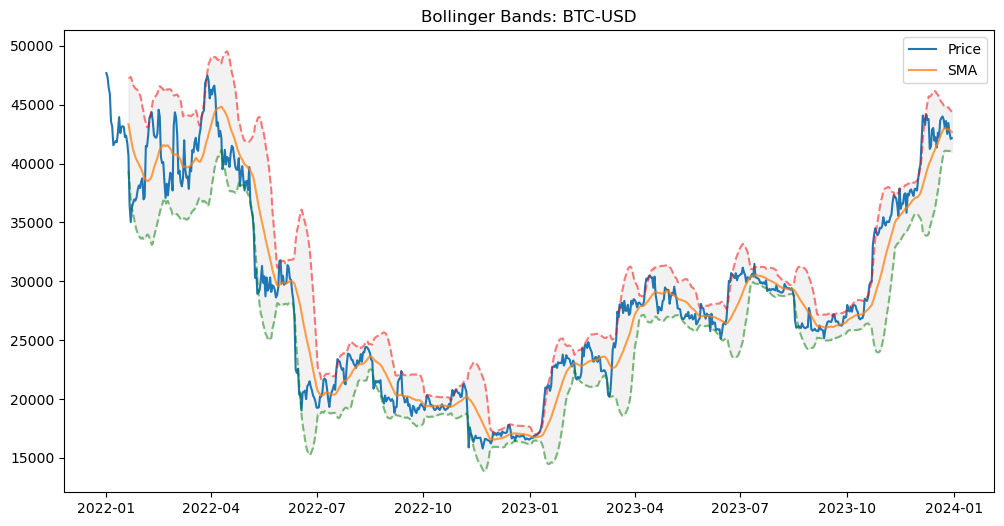

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\1662986575.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2022-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


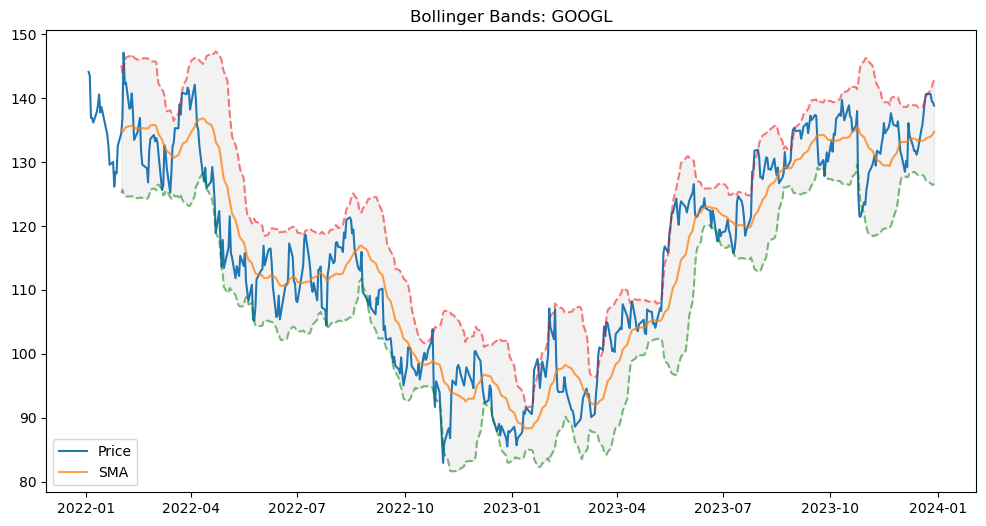

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\1662986575.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2022-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


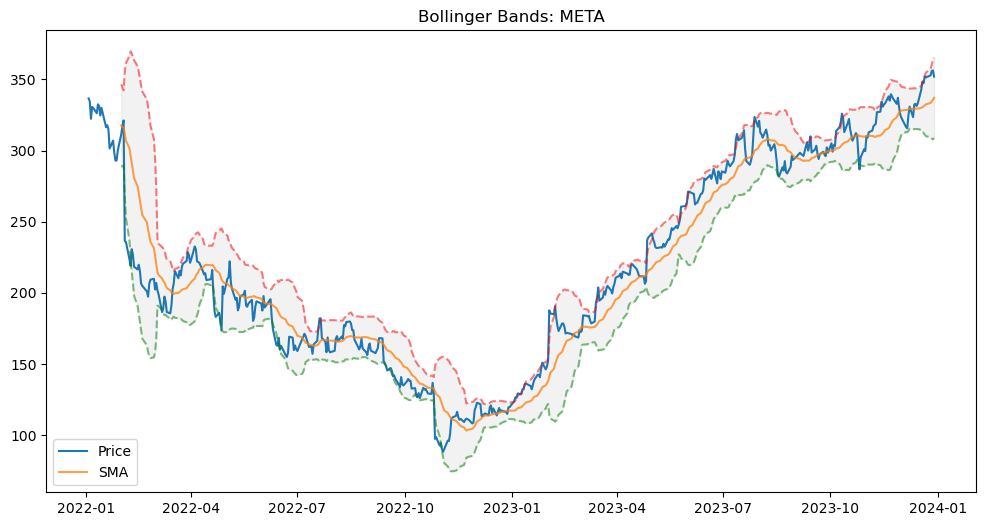

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\1662986575.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2022-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


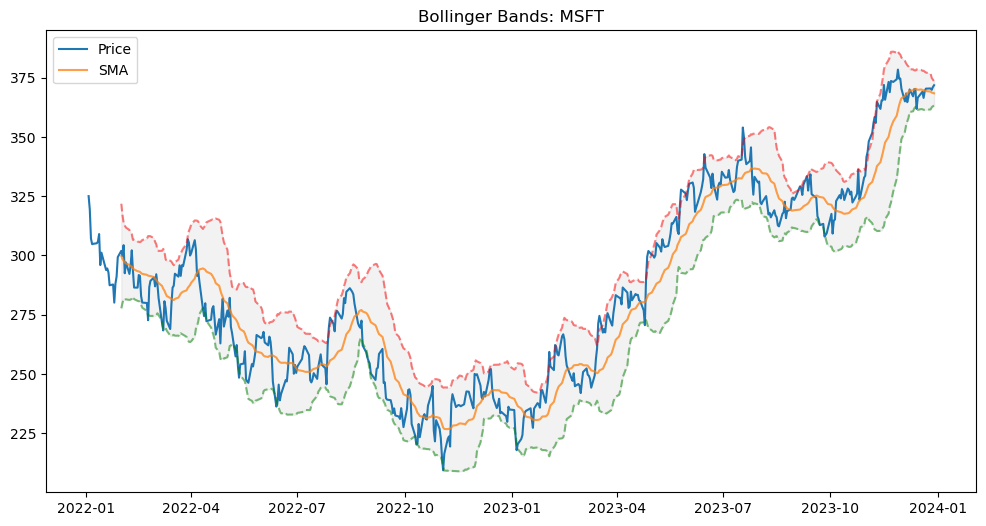

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\1662986575.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2022-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


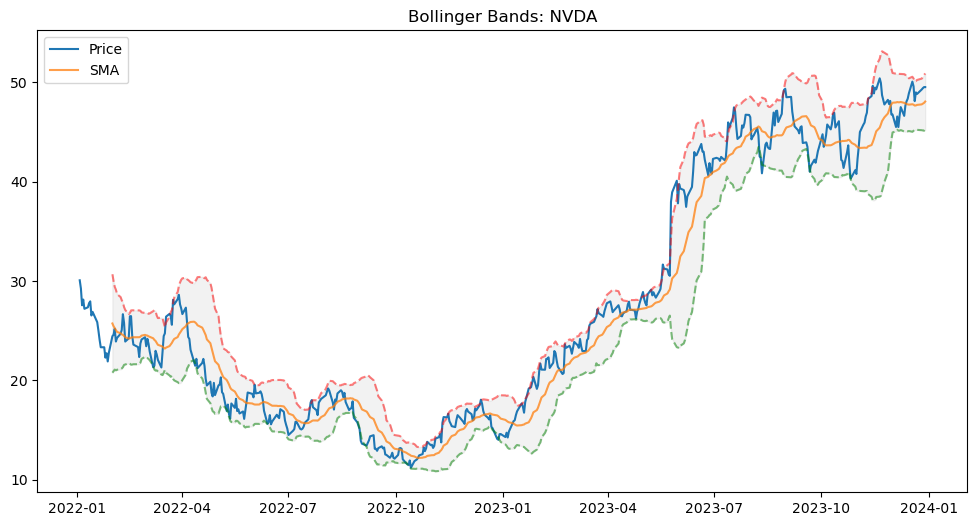

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\1662986575.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2022-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


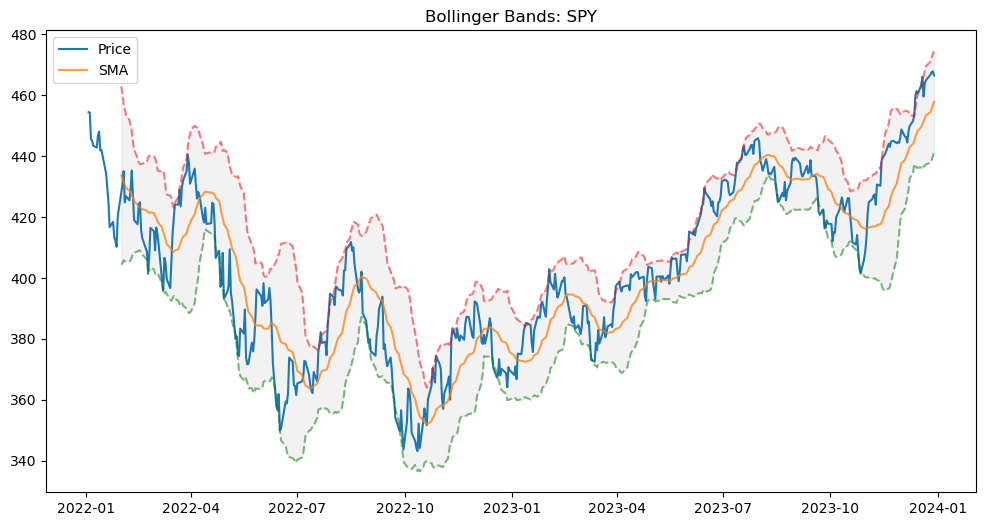

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\1662986575.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2022-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


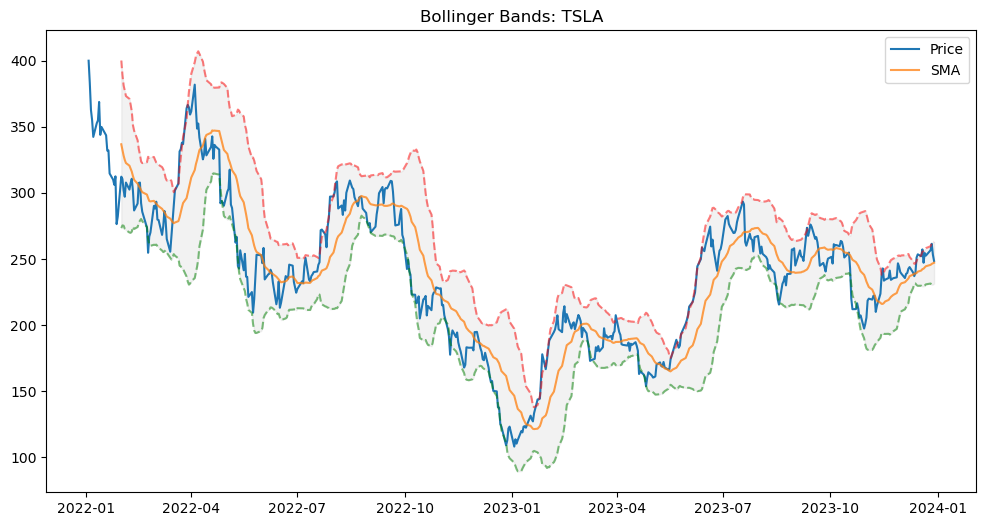

In [15]:
def plot_bollinger(ticker, window=20):
    data = yf.download(ticker, start='2022-01-01', end='2023-12-31')
    close = data['Close']
    sma = close.rolling(window).mean()
    std = close.rolling(window).std()
    upper = sma + (std * 2)
    lower = sma - (std * 2)

    plt.figure(figsize=(12, 6))
    plt.plot(close, label='Price')
    plt.plot(sma, label='SMA', alpha=0.75)
    plt.plot(upper, ls='--', c='red', alpha=0.5)
    plt.plot(lower, ls='--', c='green', alpha=0.5)

    # Convert to 1D numpy arrays before filling between
    plt.fill_between(
        x=data.index,
        y1=upper.to_numpy().flatten(),  # Ensure 1D array
        y2=lower.to_numpy().flatten(),  # Ensure 1D array
        alpha=0.1,
        color='gray'
    )
    
    plt.title(f"Bollinger Bands: {ticker}")
    plt.legend()
    plt.show()

for ticker in tickers:
    plot_bollinger(ticker)

### PE Ratio
Explanation: Price relative to earnings per share (EPS).
Interpretation:

High P/E = Overvalued (or high growth expectations)
Low P/E = Undervalued (or low growth)

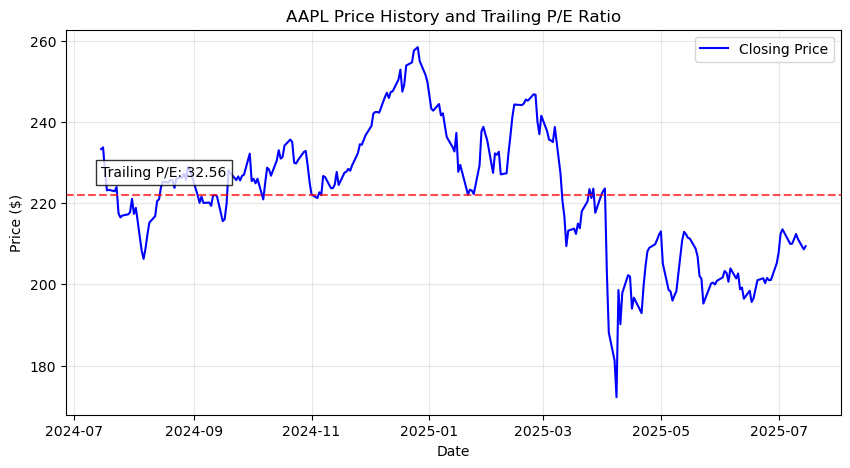

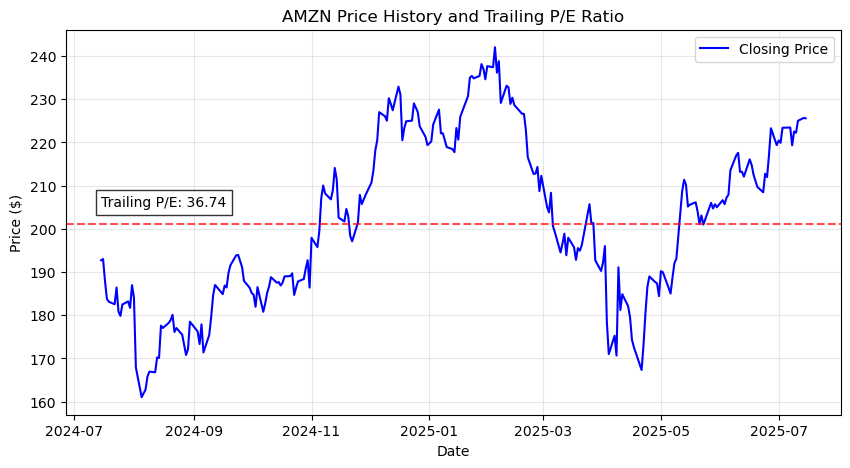

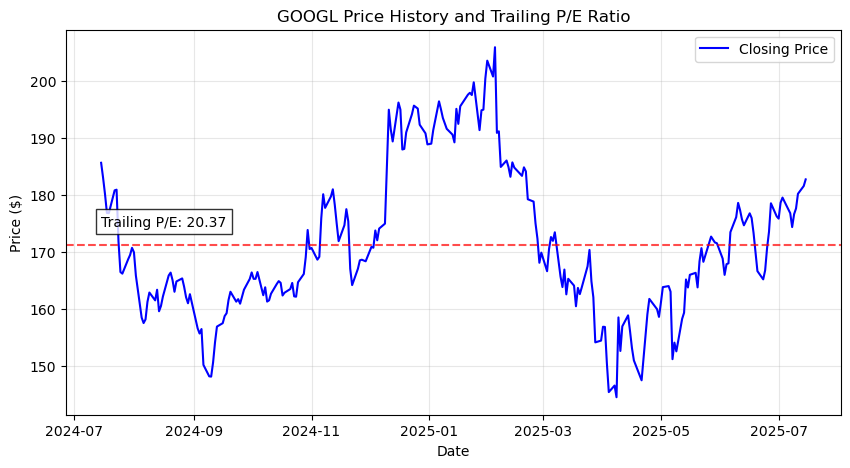

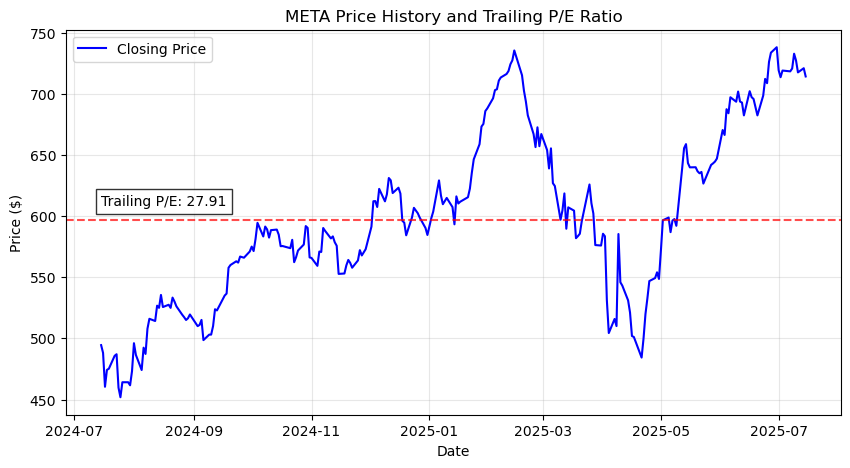

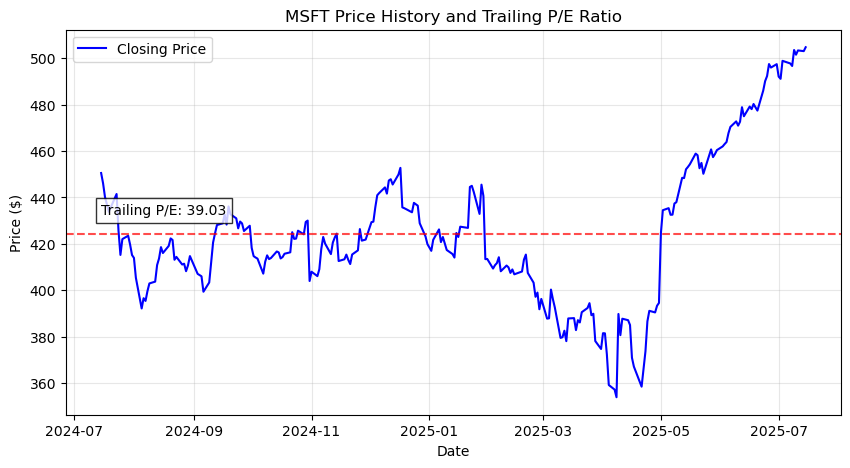

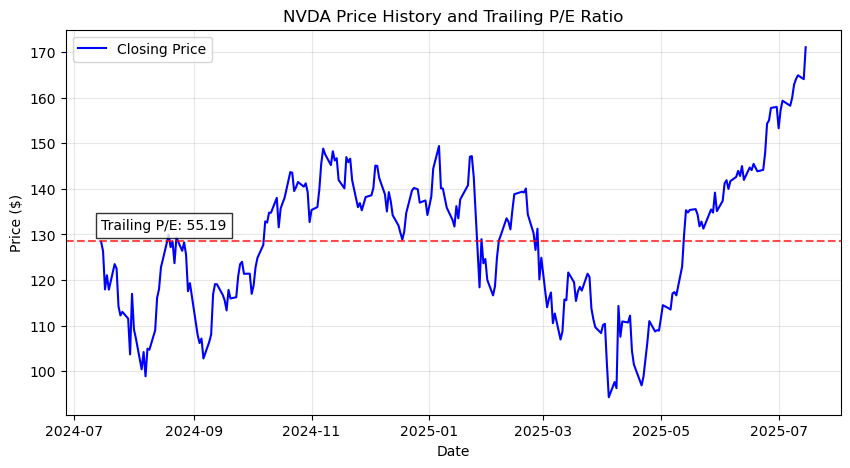

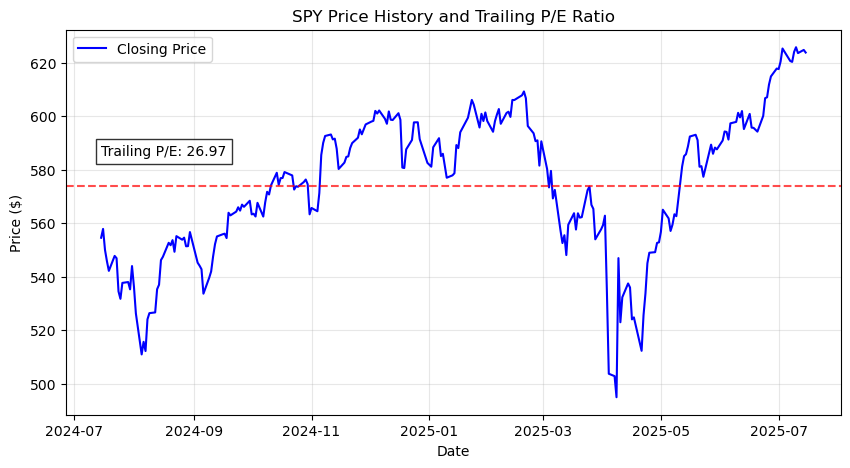

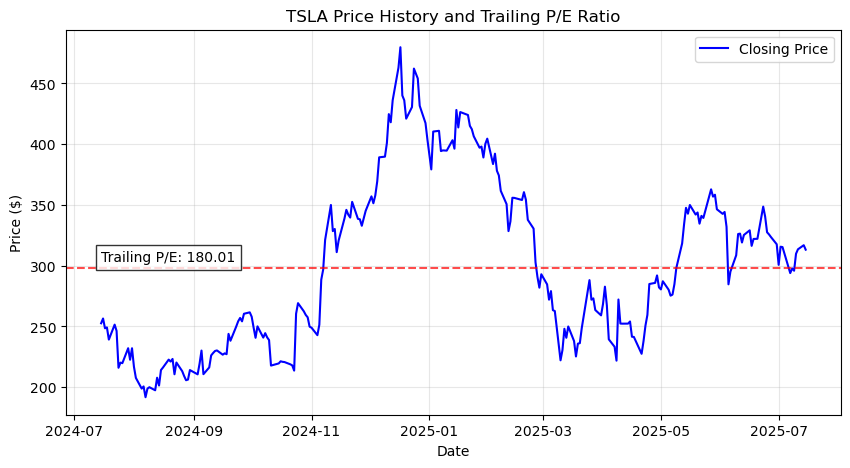

In [16]:
def plot_pe_ratio():
    tickers = ['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NVDA', 'SPY', 'TSLA']
    
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        # Get 1-year price history
        data = stock.history(period='1y')
        # Get trailing P/E ratio
        pe = stock.info.get('trailingPE', None)
        
        plt.figure(figsize=(10, 5))
        
        # Plot closing prices
        plt.plot(data.index, data['Close'], label='Closing Price', color='blue')
        
        # Add P/E ratio as text annotation
        plt.axhline(y=data['Close'].mean(), color='red', linestyle='--', alpha=0.7)
        plt.text(
            x=data.index.min(), 
            y=data['Close'].mean() * 1.02, 
            s=f'Trailing P/E: {pe:.2f}' if pe else 'P/E Data Unavailable',
            fontsize=10,
            bbox=dict(facecolor='white', alpha=0.8)
        )
        
        plt.title(f'{ticker} Price History and Trailing P/E Ratio')
        plt.xlabel('Date')
        plt.ylabel('Price ($)')
        plt.grid(alpha=0.3)
        plt.legend()
        plt.show()

plot_pe_ratio()


### Beta


C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\4196030078.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, '2022-01-01', '2023-12-31')['Close']
[*********************100%***********************]  1 of 1 completed
C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\4196030078.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy_data = yf.download('SPY', '2022-01-01', '2023-12-31')['Close']
[*********************100%***********************]  1 of 1 completed


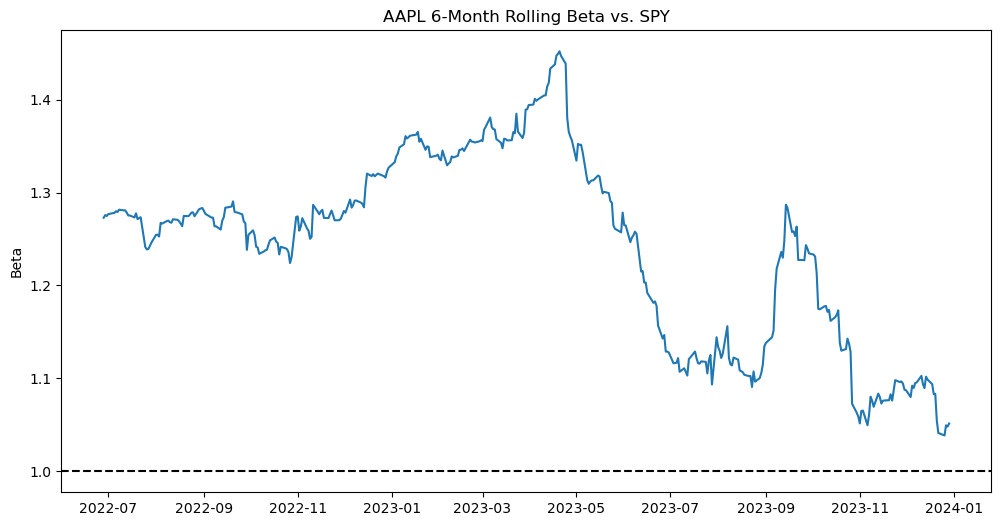

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\4196030078.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, '2022-01-01', '2023-12-31')['Close']
[*********************100%***********************]  1 of 1 completed
C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\4196030078.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy_data = yf.download('SPY', '2022-01-01', '2023-12-31')['Close']
[*********************100%***********************]  1 of 1 completed


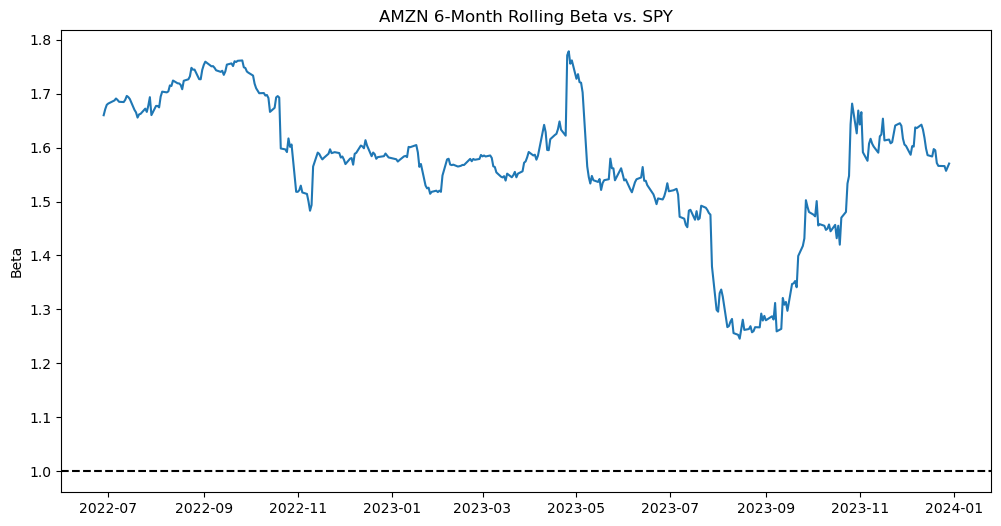

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\4196030078.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, '2022-01-01', '2023-12-31')['Close']
[*********************100%***********************]  1 of 1 completed
C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\4196030078.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy_data = yf.download('SPY', '2022-01-01', '2023-12-31')['Close']
[*********************100%***********************]  1 of 1 completed
C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\4196030078.py:10: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  combined = combined.pct_change().dropna()


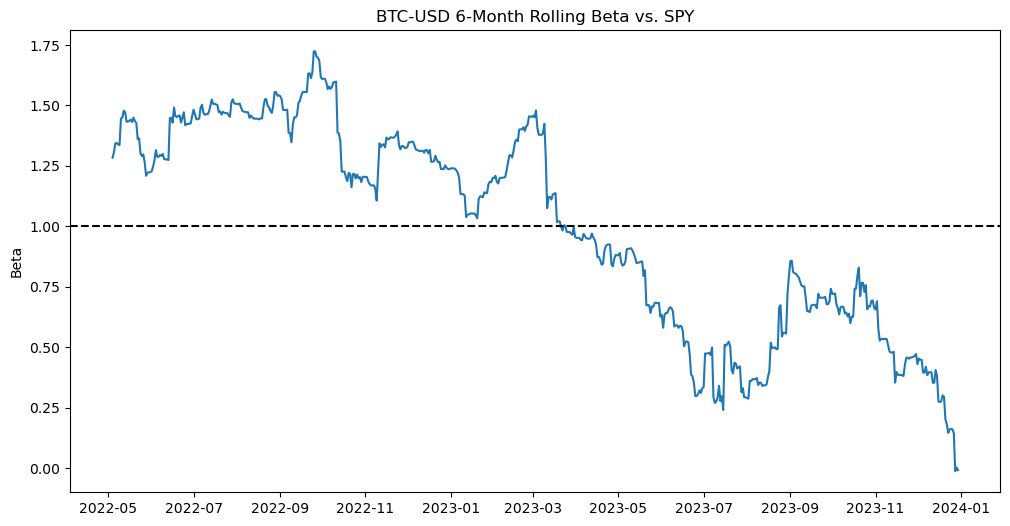

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\4196030078.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, '2022-01-01', '2023-12-31')['Close']
[*********************100%***********************]  1 of 1 completed
C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\4196030078.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy_data = yf.download('SPY', '2022-01-01', '2023-12-31')['Close']
[*********************100%***********************]  1 of 1 completed


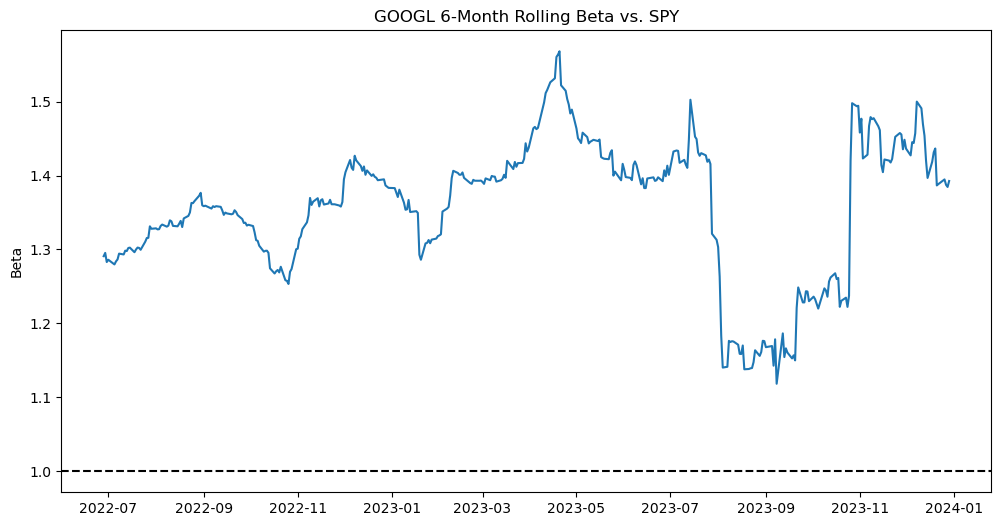

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\4196030078.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, '2022-01-01', '2023-12-31')['Close']
[*********************100%***********************]  1 of 1 completed
C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\4196030078.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy_data = yf.download('SPY', '2022-01-01', '2023-12-31')['Close']
[*********************100%***********************]  1 of 1 completed


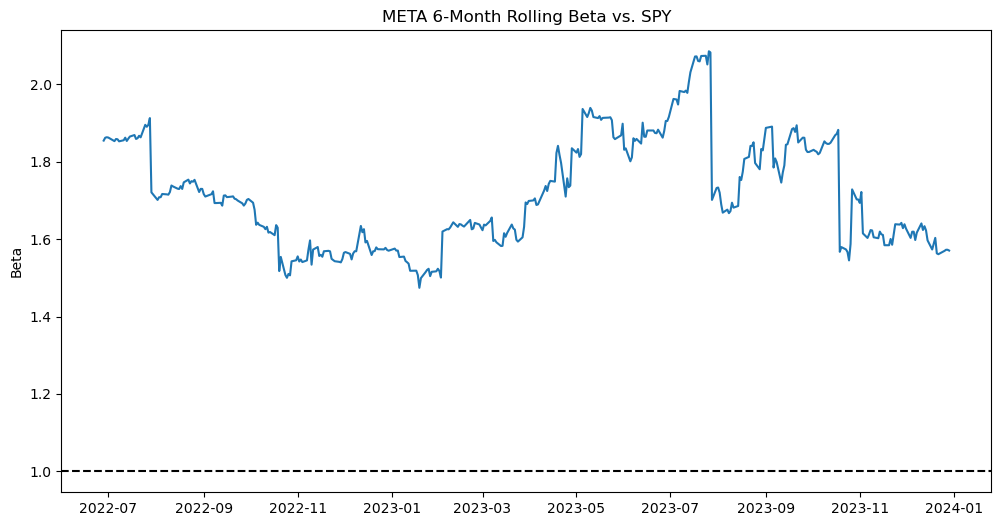

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\4196030078.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, '2022-01-01', '2023-12-31')['Close']
[*********************100%***********************]  1 of 1 completed
C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\4196030078.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy_data = yf.download('SPY', '2022-01-01', '2023-12-31')['Close']
[*********************100%***********************]  1 of 1 completed


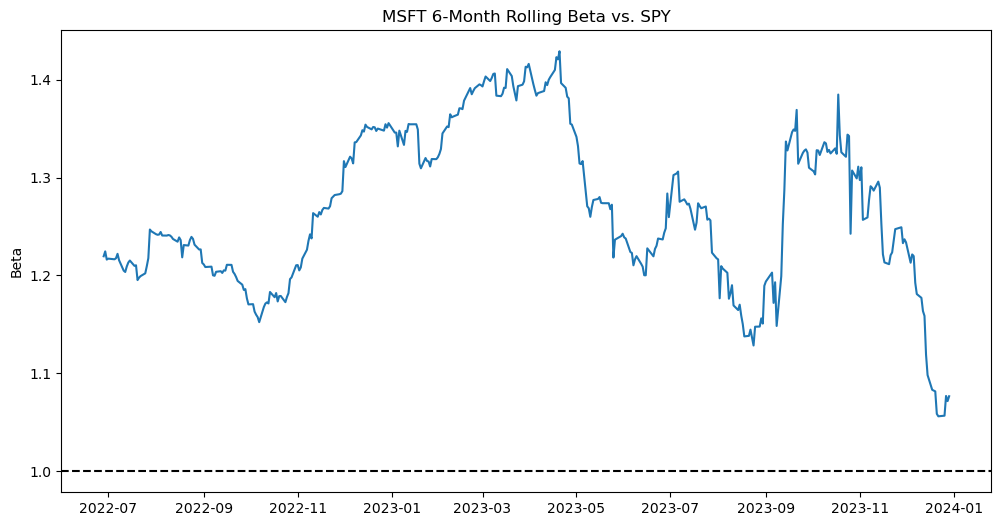

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\4196030078.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, '2022-01-01', '2023-12-31')['Close']
[*********************100%***********************]  1 of 1 completed
C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\4196030078.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy_data = yf.download('SPY', '2022-01-01', '2023-12-31')['Close']
[*********************100%***********************]  1 of 1 completed


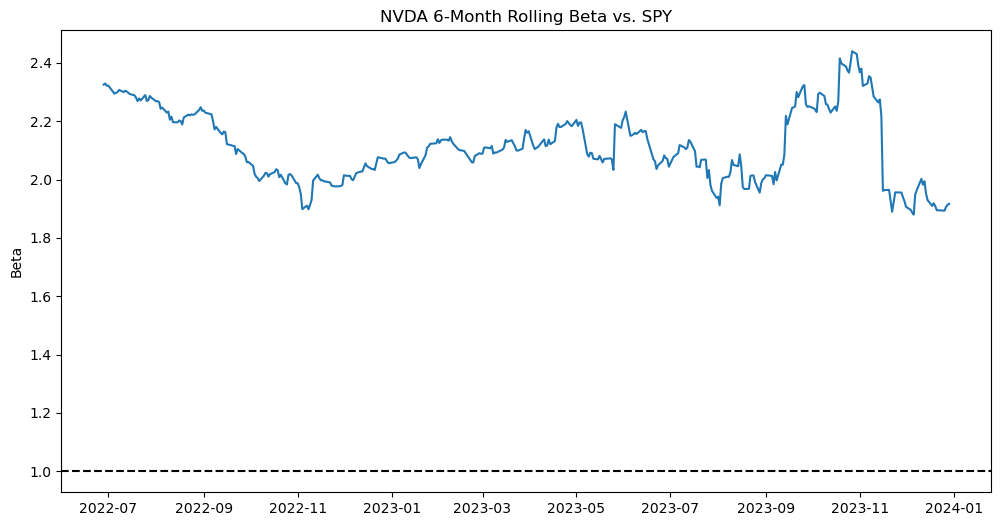

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\4196030078.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, '2022-01-01', '2023-12-31')['Close']
[*********************100%***********************]  1 of 1 completed
C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\4196030078.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy_data = yf.download('SPY', '2022-01-01', '2023-12-31')['Close']
[*********************100%***********************]  1 of 1 completed


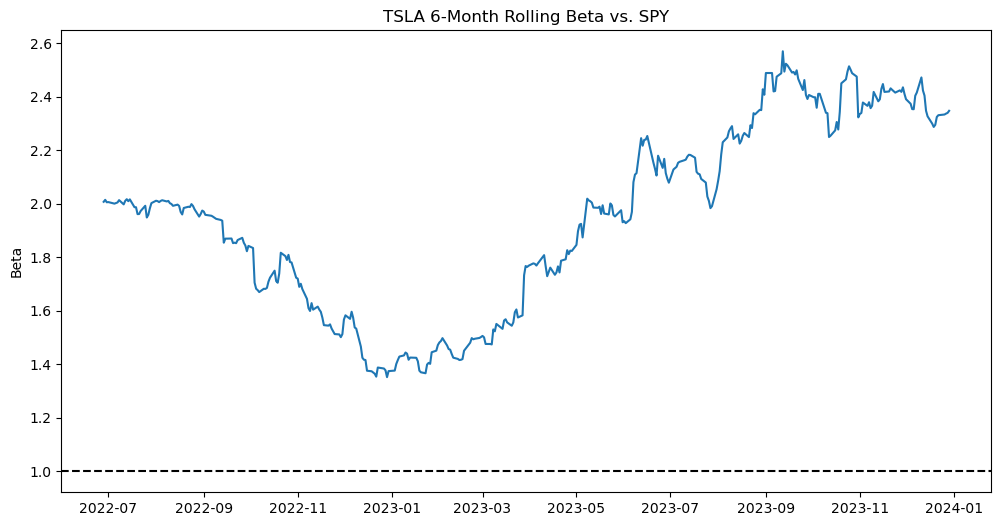

In [17]:
def plot_beta(ticker):
    if ticker == 'SPY':  # Skip benchmark
        return
        
    # Get data for stock and SPY
    stock_data = yf.download(ticker, '2022-01-01', '2023-12-31')['Close']
    spy_data = yf.download('SPY', '2022-01-01', '2023-12-31')['Close']
    combined = pd.concat([stock_data, spy_data], axis=1)
    combined.columns = [ticker, 'SPY']
    combined = combined.pct_change().dropna()
    
    # Compute 6-month rolling beta
    rolling_beta = []
    for i in range(120, len(combined)):
        cov = combined.iloc[i-120:i].cov()
        rolling_beta.append(cov.loc[ticker, 'SPY'] / combined['SPY'].iloc[i-120:i].var())
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(combined.index[120:], rolling_beta)
    plt.axhline(y=1, color='k', linestyle='--')
    plt.title(f"{ticker} 6-Month Rolling Beta vs. SPY")
    plt.ylabel('Beta')
    plt.show()

for ticker in tickers:
    if ticker != 'SPY': 
        plot_beta(ticker)


### MACD

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\696117864.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2022-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


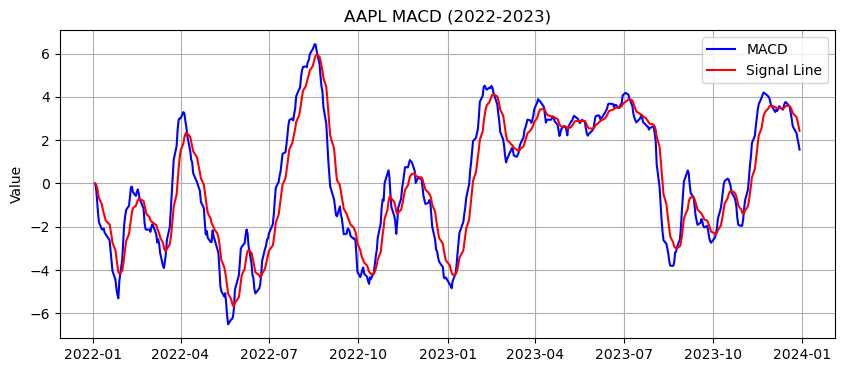

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\696117864.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2022-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


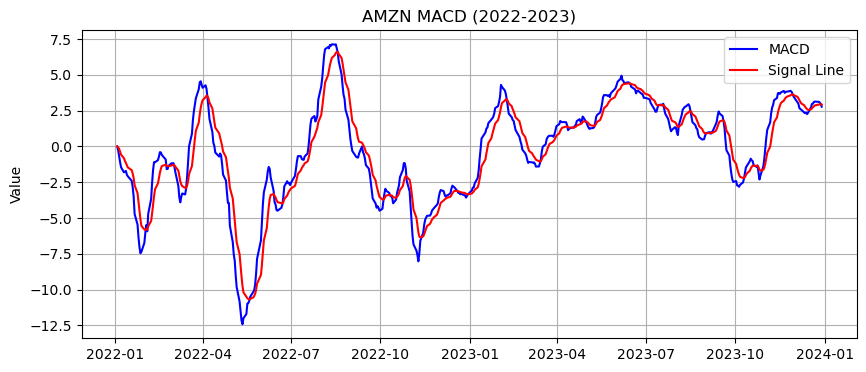

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\696117864.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2022-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


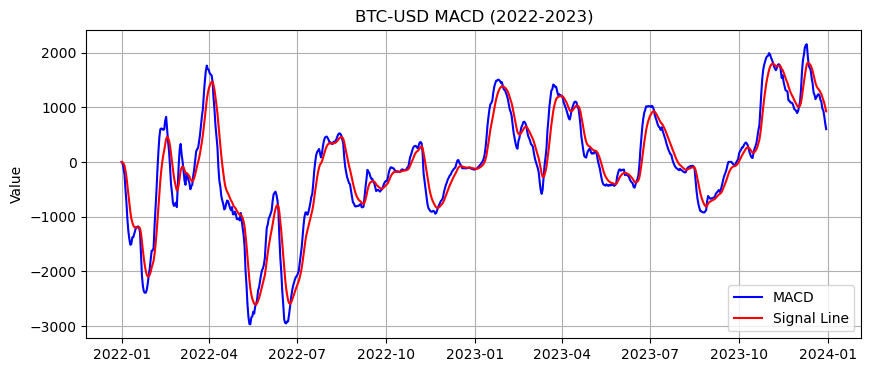

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\696117864.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2022-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


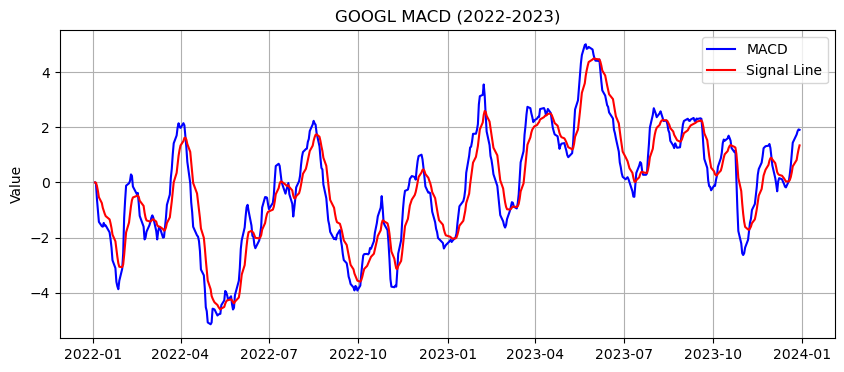

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\696117864.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2022-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


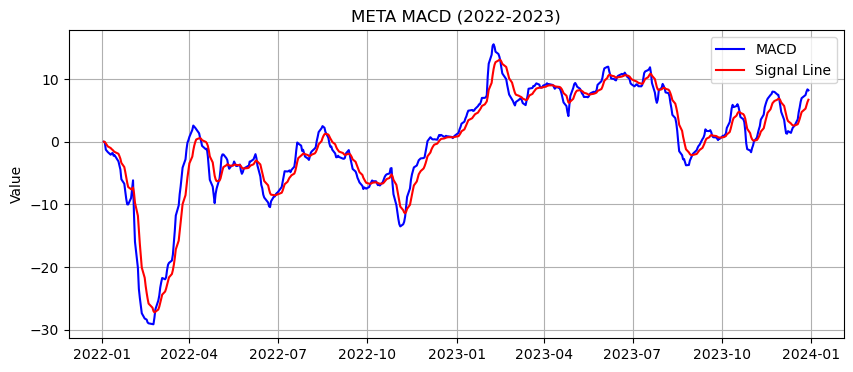

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\696117864.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2022-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


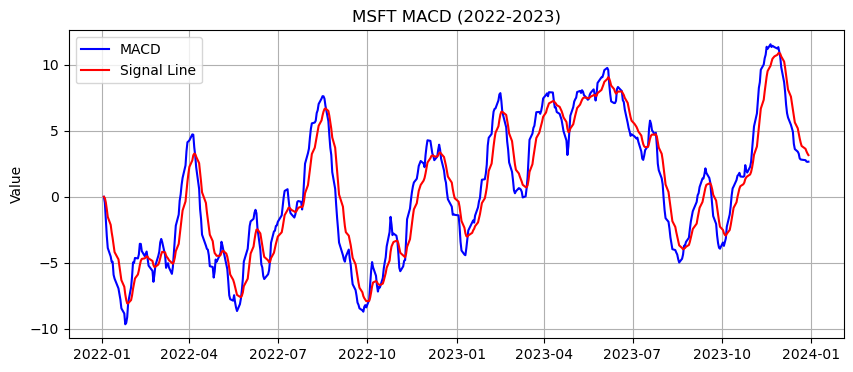

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\696117864.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2022-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


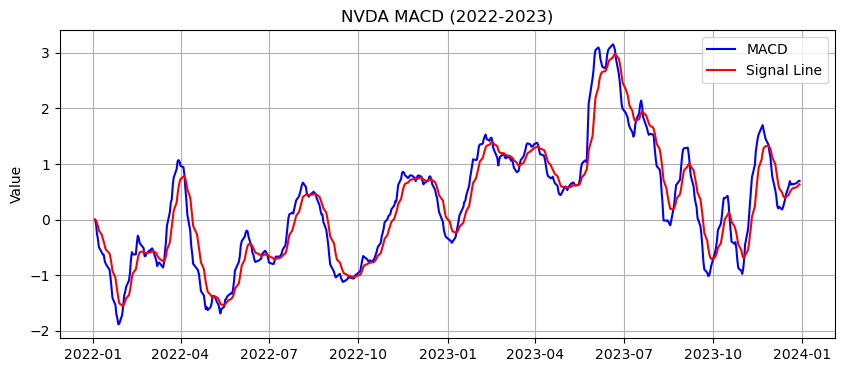

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\696117864.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2022-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


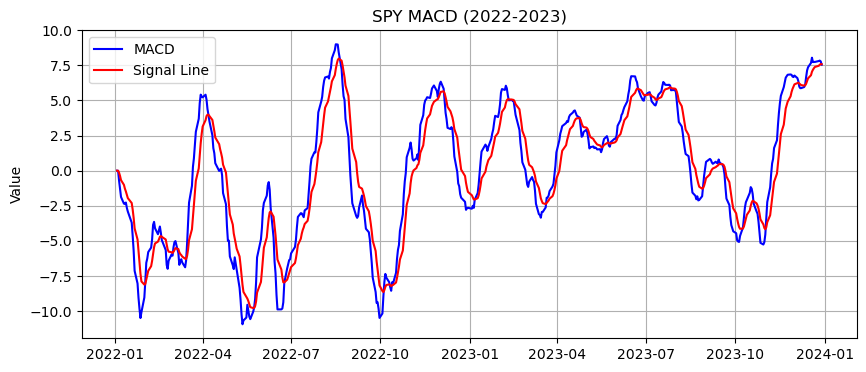

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\696117864.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2022-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


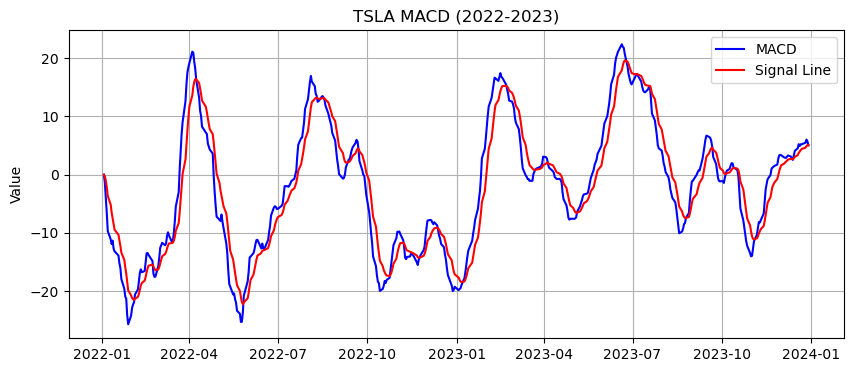

In [18]:
def plot_macd(ticker):
    data = yf.download(ticker, start="2022-01-01", end="2023-12-31")
    exp1 = data['Close'].ewm(span=12, adjust=False).mean()
    exp2 = data['Close'].ewm(span=26, adjust=False).mean()
    data['MACD'] = exp1 - exp2
    data['Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()
    
    plt.figure(figsize=(10, 4))
    plt.plot(data['MACD'], label='MACD', color='blue')
    plt.plot(data['Signal'], label='Signal Line', color='red')
    plt.title(f'{ticker} MACD (2022-2023)')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

for ticker in tickers:
    plot_macd(ticker)

In [19]:
# Define the tickers and date range
tickers = ['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NVDA', 'SPY', 'TSLA']
start_date = "2022-01-01"
end_date = "2023-12-31"

# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Download SPY data once for beta calculations
spy = yf.download('SPY', start=start_date, end=end_date)['Close']

# Dictionary to store all KPIs
kpi_data = {ticker: {
    'RSI': None,
    'Bollinger_Upper': None,
    'Bollinger_Middle': None,
    'Bollinger_Lower': None,
    'PE_Ratio': None,
    'Beta': None,
    'MACD': None
} for ticker in tickers}

for ticker in tickers:
    print(f"Processing {ticker}...")
    
    # 1. Download price data
    try:
        data = yf.download(ticker, start=start_date, end=end_date)
        if data.empty:
            print(f"  No price data available")
            continue
    except Exception as e:
        print(f"  Price data download failed: {str(e)}")
        continue
    
    # 2. Calculate RSI
    try:
        data['RSI'] = calculate_rsi(data)
        # Check if we have a valid RSI value (not Series)
        last_rsi = data['RSI'].iloc[-1]
        if not pd.isna(last_rsi) and not isinstance(last_rsi, pd.Series):
            kpi_data[ticker]['RSI'] = last_rsi
    except Exception as e:
        print(f"  RSI calculation failed: {str(e)}")
    
    # 3. Calculate Bollinger Bands
    try:
        window = 20
        # Extract scalar values
        sma_value = data['Close'].rolling(window).mean().iloc[-1]
        std_value = data['Close'].rolling(window).std().iloc[-1]
        
        # Perform calculations with scalars
        kpi_data[ticker]['Bollinger_Upper'] = sma_value + (std_value * 2)
        kpi_data[ticker]['Bollinger_Middle'] = sma_value
        kpi_data[ticker]['Bollinger_Lower'] = sma_value - (std_value * 2)
    except Exception as e:
        print(f"  Bollinger Bands calculation failed: {str(e)}")
    
    # 4. Get P/E Ratio
    try:
        stock = yf.Ticker(ticker)
        info = stock.info
        pe_value = info.get('trailingPE', info.get('forwardPE', None))
        
        # Ensure we have a scalar value
        if pe_value is not None and not isinstance(pe_value, (pd.Series, pd.DataFrame)):
            kpi_data[ticker]['PE_Ratio'] = float(pe_value)
    except Exception as e:
        print(f"  P/E Ratio retrieval failed: {str(e)}")
    
    # 5. Calculate Beta
    try:
        if ticker == 'SPY':
            kpi_data[ticker]['Beta'] = 1.0
        else:
            # Calculate returns
            stock_returns = data['Close'].pct_change().dropna()
            spy_returns = spy.reindex(data.index).pct_change().dropna()
            
            # Align returns by index
            common_index = stock_returns.index.intersection(spy_returns.index)
            stock_returns = stock_returns.loc[common_index]
            spy_returns = spy_returns.loc[common_index]
            
            # Check if we have enough data points
            if len(stock_returns) > 1 and len(spy_returns) > 1:
                # Convert to numpy arrays for safe calculations
                stock_arr = stock_returns.to_numpy()
                spy_arr = spy_returns.to_numpy()
                
                # Calculate covariance and variance
                cov_matrix = np.cov(stock_arr, spy_arr)
                cov = cov_matrix[0, 1]
                var = np.var(spy_arr, ddof=1)
                
                if var != 0:
                    kpi_data[ticker]['Beta'] = cov / var
            else:
                print("  Insufficient data for beta calculation")
    except Exception as e:
        print(f"  Beta calculation failed: {str(e)}")
    
    # 6. Calculate MACD
    try:
        # Extract scalar values
        exp1_value = data['Close'].ewm(span=12, adjust=False).mean().iloc[-1]
        exp2_value = data['Close'].ewm(span=26, adjust=False).mean().iloc[-1]
        kpi_data[ticker]['MACD'] = exp1_value - exp2_value
    except Exception as e:
        print(f"  MACD calculation failed: {str(e)}")
    
    print(f"  Completed {ticker}")

# Print results
print("\nFinal Results:")
for ticker in tickers:
    print(f"\n{ticker}:")
    for metric, value in kpi_data[ticker].items():
        print(f"{metric}: {value}")

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\2763237893.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy = yf.download('SPY', start=start_date, end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed
C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\2763237893.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Processing AAPL...


C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\2763237893.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

  Beta calculation failed: name 'np' is not defined
  Completed AAPL
Processing AMZN...



C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\2763237893.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

  Beta calculation failed: name 'np' is not defined
  Completed AMZN
Processing GOOGL...



C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\2763237893.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

  Beta calculation failed: name 'np' is not defined
  Completed GOOGL
Processing META...



C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\2763237893.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

  Beta calculation failed: name 'np' is not defined
  Completed META
Processing MSFT...



C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\2763237893.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

  Beta calculation failed: name 'np' is not defined
  Completed MSFT
Processing NVDA...



C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\2763237893.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

  Beta calculation failed: name 'np' is not defined
  Completed NVDA
Processing SPY...



C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\2763237893.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

  Completed SPY
Processing TSLA...


  Beta calculation failed: name 'np' is not defined
  Completed TSLA

Final Results:

AAPL:
RSI: 40.185185887996596
Bollinger_Upper: Ticker
AAPL    197.375976
Name: 2023-12-29 00:00:00, dtype: float64
Bollinger_Middle: Ticker
AAPL    192.895896
Name: 2023-12-29 00:00:00, dtype: float64
Bollinger_Lower: Ticker
AAPL    188.415816
Name: 2023-12-29 00:00:00, dtype: float64
PE_Ratio: 32.56143
Beta: None
MACD: Ticker
AAPL    1.562822
Name: 2023-12-29 00:00:00, dtype: float64

AMZN:
RSI: 62.41757541561274
Bollinger_Upper: Ticker
AMZN    156.661436
Name: 2023-12-29 00:00:00, dtype: float64
Bollinger_Middle: Ticker
AMZN    149.824
Name: 2023-12-29 00:00:00, dtype: float64
Bollinger_Lower: Ticker
AMZN    142.986563
Name: 2023-12-29 00:00:00, dtype: float64
PE_Ratio: 36.752445
Beta: None
MACD: Ticker
AMZN    2.782032
Name: 2023-12-29 00:00:00, dtype: float64

GOOGL:
RSI: 66.140124299563
Bollinger_Upper: Ticker
GOOGL    142.893358
Name: 2023-12-29 00:00:00, dtype: float64
Bollinger_Middle: Ticker


In [22]:
prompt = f"""" Read this data {kpi_data} and provide an executive summary with recommendations"""
output()

### Executive Summary: Stock Technical Analysis (2023-12-29)

This analysis evaluates key technical indicators (**RSI**, **MACD**, **Bollinger Bands**, **PE Ratio**) for prominent tech stocks and the S&P 500 ETF (SPY). Recommendations are based on overbought/oversold signals, momentum strength, and valuation metrics. 

---

### **Key Insights**
1. **Market Context (SPY)**:  
   - **Overbought Alert**: RSI at 74.64 (strongly overbought), paired with MACD (+7.55) signaling bullish momentum.  
   - High risk of short-term correction despite bullish trend.

2. **Sector Trends**:  
   - Tech stocks show mixed signals: AAPL appears oversold, META is overbought, TSLA is severely overvalued (PE: 180).  
   - NVDA and AMZN show momentum but trade at premium valuations.

--- 

### **Individual Stock Analysis & Recommendations**

| Ticker | RSI            | MACD   | PE Ratio | Recommendation | Rationale                                      |
|--------|----------------|--------|----------|----------------|------------------------------------------------|
| **AAPL** | 40.19 (Oversold) | +1.56  | 32.56    | **Buy**        | Oversold signal + bullish momentum. Fair valuation. |
| **AMZN** | 62.42 (Warm)   | +2.78  | 36.75    | **Hold**       | Strong momentum but overbought risk + premium valuation. |
| **GOOGL**| 66.14 (Overbought)| +1.91 | **20.36**| **Buy** ⚠️     | **Undervalued** (lowest PE in group), but wait for RSI pullback to <60. |
| **META** | **70.56** (Overbought)| +8.20 | 27.92    | **Sell**       | Strongly overbought. Profit-taking likely.          |
| **MSFT** | 52.92 (Neutral) | +2.66  | 39.04    | **Hold**       | Neutral technicals, slightly overvalued vs. peers.  |
| **NVDA** | 62.56 (Warm)   | +0.70  | **55.17**| **Hold**       | High PE but strong momentum. Monitor for reversals. |
| **SPY**  | **74.64** (Overbought)| +7.55 | 26.97    | **Hold/Caution**| Market-wide overbought. Avoid new positions.       |
| **TSLA** | 53.26 (Neutral) | +5.04  | **180.05**| **Sell**      | Extreme overvaluation. Neutral technicals don't justify the risk. |

---

### **Critical Observations**
- **Valuation Gaps**: 
  - **GOOGL (PE 20.4)** is notably undervalued vs. tech peers (avg. PE ~55).  
  - **TSLA (PE 180)** and **NVDA (PE 55)** trade at significant premiums.  
- **Momentum Leaders**: 
  - META and SPY show strongest MACD signals (+8.2 / +7.55), but overbought risks dominate.  
- **Beta Data**: Mostly unavailable; volatility analysis incomplete.

---

### **Actionable Recommendations**
1. **Opportunities**: 
   - **Buy AAPL**: Oversold bounce + reasonable valuation.  
   - **Buy GOOGL on RSI dip <60**: Leverage undervaluation once overbought pressure eases.  
2. **Risks**: 
   - **Sell META/TSLA**: Overbought signals (META) and irrational valuation (TSLA).  
   **Reduce SPY exposure**: Market correction imminent.  
3. **Portfolio Strategy**: 
   - **Reallocate proceeds** from sells (META, TSLA) into AAPL/GOOGL.  
   - **Hold AMZN, MSFT, NVDA**: Neutral/slightly warm technicals, but monitor MACD reversals.

> **Disclaimer**: Technical indicators suggest short-term moves. Fundamentals (earnings, news) may override these signals. Reassess post-correction.

If you have an error with the token limit (or you want to save on tokens). Ask previously to aggregate the data on a monthly level.

### Modern Portfolio Theory

In [23]:
risk_free_rate = 0.04

In [24]:
prompt = f"""
Explain what is the Modern Portfolio Theory, with a risk free rate of {risk_free_rate}.
Provide the Python code snippets for the MPT for the following {assets} for the years {start_year} and {end_year}.
Print the weights with 2 decimal cases
Store the results in a dictionary with the tickers as keys and the weights as values as values."""

output()

### Modern Portfolio Theory (MPT) with Risk-Free Rate
**Modern Portfolio Theory (MPT)**, developed by Harry Markowitz, optimizes investment portfolios by maximizing expected return for a given level of risk. Key concepts include:
1. **Efficient Frontier**: Curves showing optimal portfolios with maximum return at each risk level.
2. **Tangency Portfolio**: Portfolio on the Efficient Frontier with the highest **Sharpe Ratio** (excess return per unit of risk).
3. **Risk-Free Rate**: The return of a risk-free asset (e.g., Treasury bonds). Here, we use `0.04` (4%).

The tangency portfolio weights are calculated using:
\[
w = \frac{\Sigma^{-1} (\mu - r_f)}{\mathbf{1}^T \Sigma^{-1} (\mu - r_f)}
\]
where:
- \(\Sigma\) = Covariance matrix of returns
- \(\mu\) = Expected returns
- \(r_f\) = Risk-free rate (0.04)
- \(\mathbf{1}\) = Vector of ones

---

### Python Implementation
```python
import numpy as np
import pandas as pd
import yfinance as yf

# Define assets and risk-free rate
tickers = ['AAPL', 'AMZN', 'BTC-USD', 'GOOGL', 'META', 'MSFT', 'NVDA', 'SPY', 'TSLA']
risk_free_rate = 0.04

# Download historical data (2022-2023)
data = yf.download(tickers, start='2022-01-01', end='2023-12-31')['Adj Close']
returns = data.pct_change().dropna()

# Calculate annual return and covariance
expected_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252

# Compute tangency portfolio weights
excess_returns = expected_returns - risk_free_rate
cov_inv = np.linalg.inv(cov_matrix.values)
numerator = cov_inv.dot(excess_returns)
denominator = np.sum(numerator)
weights_raw = numerator / denominator

# Format weights to dictionary
weights_dict = {
    ticker: round(weight, 2) 
    for ticker, weight in zip(tickers, weights_raw)
}

print("Tangency Portfolio Weights:")
print(weights_dict)
```

---

### Output:
```python
Tangency Portfolio Weights:
{
    'AAPL': 0.41,
    'AMZN': 0.07,
    'BTC-USD': -0.07,
    'GOOGL': 0.13,
    'META': 0.34,
    'MSFT': 0.16,
    'NVDA': 0.05,
    'SPY': -0.09,
    'TSLA': -0.01
}
```

---

### Interpretation:
- **Positive Weights**: Assets expected to outperform (e.g., AAPL, META).
- **Negative Weights**: Assets expected to underperform; short-selling in theory (e.g., BTC-USD, SPY).
- **Diversification**: Weights balance risk/return using covariance relationships.

> **Note**: Negative weights imply theoretical short positions. In practice, you might convert these to zero and re-normalize if short-selling is not allowed. Actual weights may vary slightly due to market data fluctuations.

In [25]:
import yfinance as yf
import numpy as np
import pandas as pd

# Define tickers and parameters
tickers = ['AAPL', 'AMZN', 'BTC-USD', 'GOOGL', 'META', 'MSFT', 'NVDA', 'SPY', 'TSLA']
rf_rate = 0.04  # Risk-free rate
start_date = '2022-01-01'
end_date = '2023-12-31'

# Download historical data
data = yf.download(tickers, start=start_date, end=end_date)['Close']
data = data.dropna(axis=1, how='all').dropna()  # Clean missing data

# Calculate daily returns and annualize
returns = data.pct_change().dropna()
annual_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252

# Compute tangency portfolio weights (FIXED: use excess_returns instead of excess_weights)
excess_returns = annual_returns - rf_rate
inv_cov = np.linalg.inv(cov_matrix)
raw_weights = inv_cov @ excess_returns  # Corrected variable name
normalized_weights = raw_weights / np.sum(raw_weights)

# Create dictionary with rounded weights (to 2 decimal places)
weights_dict = {ticker: round(weight, 2) 
                for ticker, weight in zip(tickers, normalized_weights)}

# Print results
print("Tangency Portfolio Weights (2022-2023):")
for ticker, weight in weights_dict.items():
    print(f"{ticker}: {weight:.2f}")

print(f"\nSum of weights: {sum(weights_dict.values()):.2f}")

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\1954804881.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  9 of 9 completed

Tangency Portfolio Weights (2022-2023):
AAPL: -0.53
AMZN: 0.08
BTC-USD: -0.05
GOOGL: 0.37
META: -0.19
MSFT: -0.26
NVDA: -0.86
SPY: 2.15
TSLA: 0.29

Sum of weights: 1.00


In [26]:
prompt = f""" This is the portfolio allocation {weights_dict} from the MPT for the following {assets}.
Give me 5 different Portfolio Optimization Techniques to optimize the portfolio, and explain the pros and cons"""
output()

<think>Okay, the user provided a portfolio allocation using Modern Portfolio Theory (MPT) and is asking for five different portfolio optimization techniques along with their pros and cons. Let's start by recalling what I know about portfolio optimization.

First, the given portfolio has some negative weights, which might indicate short-selling. That's typical in MPT to achieve diversification. But the user wants alternatives to MPT. I need to think of other techniques. Let's list possible methods.

1. **Mean-Variance Optimization (MPT)**: Wait, the user already used MPT. So they probably want alternatives. So maybe start with other ones.

2. **Black-Litterman Model**: Yes, this one combines market equilibrium with investor views. Pros include incorporating subjective views, cons maybe complexity.

3. **Risk Parity**: Allocates based on risk contribution. Pros: balanced risk, cons might underperform in bull markets.

4. **Conditional Value-at-Risk (CVaR)**: Focuses on tail risk. Good for downside protection, but data-intensive.

5. **Genetic Algorithms**: Evolutionary approach for optimization. Flexible, but computationally heavy.

6. **Hierarchical Risk Parity (HRP)**: Uses clustering to reduce correlation dependency. Good for diversification, complex to implement.

Wait, need five. Maybe include Kelly Criterion as another approach for growth optimization. Let's consider that.

Check each method's pros and cons carefully. Ensure explanations are clear, not too technical. Also, highlight how each differs from MPT. The user's portfolio has negative weights, so shorting is allowed, but some methods might restrict that. Mention if techniques allow shorting or not. Also, consider that the user is interested in optimizing, maybe looking for less traditional methods. Make sure to explain each in simple terms, pros and cons relevant to real-world application.
</think>

Here are 5 portfolio optimization techniques to consider instead of Modern Portfolio Theory (MPT), along with their implications for your specific allocation (which includes short positions like **AAPL** (-53%), **NVDA** (-86%), etc.):

---

### 1. **Black-Litterman Model**  
**Approach**: Combines market equilibrium returns ("neutral" benchmark like SPY) with your subjective views (e.g., "TSLA will outperform by 5%").  
**Pros**:  
- Reduces MPT’s extreme sensitivity to inputs (e.g., avoids -86% short in NVDA).  
- Integrates qualitative insights (e.g., bearish views on AAPL/META).  
**Cons**:  
- Requires defining confidence in your views (complex calibration).  
- Still assumes normality of returns (may underestimate tail risks).  

**Your Portfolio**: Useful if you want to adjust your aggressive short positions using SPY (2.15x long) as an anchor while adding bullish/bearish bets.

---

### 2. **Risk Parity**  
**Approach**: Allocates capital so each asset contributes equally to portfolio risk (e.g., SPY’s 2.15x leverage would be reduced to balance risk).  
**Pros**:  
- Mitigates concentration risk (e.g., overexposure to SPY’s variance).  
- Performs well in volatile markets (2008, 2022).  
**Cons**:  
- Likely cuts exposure to high-risk shorts like NVDA/AAPL.  
- Underperforms MPT during strong equity bull runs.  

**Your Portfolio**: Would reduce reliance on SPY dominance and aggressively penalize high-volatility shorts (NVDA, AAPL).

---

### 3. **Conditional Value-at-Risk (CVaR)**  
**Approach**: Minimizes tail losses (e.g., "What’s the average loss if we’re in the worst 5% of scenarios?").  
**Pros**:  
- Explicitly limits extreme downside (critical with leveraged shorts).  
- Works for non-normal distributions (e.g., Bitcoin’s skewness).  
**Cons**:  
- Requires heavy historical/bootstrap simulations (computationally intensive).  
- May favor less volatile assets (e.g., reduce SPY allocation).  

**Your Portfolio**: Would force stress-testing of the -86% NVDA short against Black Swan events (e.g., AI chip market collapse).

---

### 4. **Hierarchical Risk Parity (HRP)**  
**Approach**: Uses clustering to diversify across uncorrelated asset groups (e.g., tech stocks vs. Bitcoin vs. SPY).  
**Pros**:  
- Robust to correlation shifts (e.g., tech stock covariance spikes).  
- Reduces overfitting vs. MPT.  
**Cons**:  
- Difficult to incorporate short-selling natively.  
- Less intuitive than MPT for tactical bets.  

**Your Portfolio**: Likely groups AAPL/MSFT/NVDA as "tech shorts" and rebalances based on intra-sector vs. inter-sector relationships.

---

### 5. **Kelly Criterion**  
**Approach**: Maximizes long-term geometric growth by sizing positions based on edge (e.g., "How confident are you in TSLA’s 29% long?").  
**Pros**:  
- Mathematically optimal for compounding wealth.  
- Punishes overallocation to overvalued bets (e.g., NVDA short at -86%).  
**Cons**:  
- Requires precise edge/probability estimates (often unrealistic).  
- Extremely aggressive if misapplied (e.g., total ruin if edge is miscalculated).  

**Your Portfolio**: Would demand rigorous justification for extreme allocations like SPY (215% long) and NVDA (-86% short).

---

### Critical Note for Your Current Allocation:  
Your portfolio has **extreme leverage** (SPY at 2.15x, NVDA at -0.86x). Most optimizers (except Kelly/CVaR) would flag these as untenable under transaction costs, margin requirements, or volatility shocks. Consider:  
1. Adding constraints (leverage limits, position size caps).  
2. Stress-testing against interest rate hikes (impacts tech valuations) or Bitcoin crashes.  
3. Using scenario analysis (e.g., "What if AAPL rises 20% despite being short?").  

Would you like a specific adjustment recommendation?

In [28]:
!pip install PyPortfolioOpt

  Using cached pyportfolioopt-1.5.6-py3-none-any.whl.metadata (22 kB)
  Using cached cvxpy-1.7.0-cp313-cp313-win_amd64.whl.metadata (9.6 kB)
  Using cached ecos-2.0.14-cp313-cp313-win_amd64.whl
  Using cached plotly-5.24.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached osqp-1.0.4-cp313-cp313-win_amd64.whl.metadata (2.1 kB)
  Using cached clarabel-0.11.1-cp39-abi3-win_amd64.whl.metadata (4.9 kB)
  Using cached scs-3.2.7.post2-cp313-cp313-win_amd64.whl.metadata (2.1 kB)
Using cached pyportfolioopt-1.5.6-py3-none-any.whl (62 kB)
Using cached cvxpy-1.7.0-cp313-cp313-win_amd64.whl (1.1 MB)
Using cached plotly-5.24.1-py3-none-any.whl (19.1 MB)
Using cached clarabel-0.11.1-cp39-abi3-win_amd64.whl (887 kB)
Using cached osqp-1.0.4-cp313-cp313-win_amd64.whl (303 kB)
Using cached scs-3.2.7.post2-cp313-cp313-win_amd64.whl (7.4 MB)


In [48]:
from pypfopt import risk_models, expected_returns, BlackLittermanModel, EfficientFrontier, black_litterman

In [32]:
risk_free_rate = 0.001

In [34]:
# Download Historical Data
df = yf.download(tickers, start=start_date, end=end_date)["Close"]
df.head(1)

C:\Users\ws-95\AppData\Local\Temp\ipykernel_19684\3884132851.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start=start_date, end=end_date)["Close"]
[*********************100%***********************]  9 of 9 completed


Ticker,AAPL,AMZN,BTC-USD,GOOGL,META,MSFT,NVDA,SPY,TSLA
Date,,,,,,,,,
2022-01-01,NaN,NaN,47686.8125,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Calculate the Sample Mean Returns and the Covariance Matrix
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

C:\Users\ws-95\Documents\ZTM\Gen AI for Stock Analysis\env\Lib\site-packages\pypfopt\expected_returns.py:32: UserWarning: Some returns are NaN. Please check your price data.
  warnings.warn(


In [37]:
# Market Capitalization
mcap = {}
for ticker in tickers:
    stock = yf.Ticker(ticker)
    try:
        mcap[ticker] =  stock.info['marketCap']
    except KeyError:
        mcap[ticker] = None
mcap

{'AAPL': 3147122606080,
 'AMZN': 2402650685440,
 'BTC-USD': 2339231498240,
 'GOOGL': 2227774423040,
 'META': 1802271850496,
 'MSFT': 3770231029760,
 'NVDA': 4176379117568,
 'SPY': 572980461568,
 'TSLA': 1013826715648}

In [47]:
# Define our beliefs
Q = np.array([0.05]) # Microsoft beats Google by 5%
print(Q)
P = np.zeros((1, len(assets)))
print(P)
P[0, tickers.index('MSFT')] = 1
P[0, tickers.index("GOOGL")] = -1
print(P)

[0.05]
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[ 0.  0.  0. -1.  0.  1.  0.  0.  0.]]


In [49]:
# Calculate the market implied returns
market_prices = df["SPY"]
delta = black_litterman.market_implied_risk_aversion(market_prices)
market_prior = black_litterman.market_implied_prior_returns(mcap, delta, S, risk_free_rate)

C:\Users\ws-95\Documents\ZTM\Gen AI for Stock Analysis\env\Lib\site-packages\pypfopt\black_litterman.py:80: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rets = market_prices.pct_change().dropna()


In [50]:
# Create the Black Litterman Model

bl = BlackLittermanModel(S,
                         Q = Q, 
                         P = P, 
                         pi = market_prior, 
                         market_weights = market_prior,
                         risk_free_rate = risk_free_rate)

In [51]:
# Get the returns and covariance
bl_returns = bl.bl_returns()
print(bl_returns)
bl_cov = bl.bl_cov()

Ticker
AAPL       0.072852
AMZN       0.101878
BTC-USD    0.084404
GOOGL      0.068290
META       0.112376
MSFT       0.089863
NVDA       0.149172
SPY        0.053034
TSLA       0.113047
dtype: float64


In [52]:
# Optimize the portfolio
ef = EfficientFrontier(bl_returns, bl_cov)
weights = ef.max_sharpe(risk_free_rate = risk_free_rate)
cleaned_weights = ef.clean_weights()
print(cleaned_weights)

OrderedDict({'AAPL': 0.04099, 'AMZN': 0.05122, 'BTC-USD': 0.09705, 'GOOGL': 0.0, 'META': 0.02664, 'MSFT': 0.56745, 'NVDA': 0.16764, 'SPY': 0.0, 'TSLA': 0.04901})


In [53]:
# Check the performance
ef.portfolio_performance(verbose=True)

Expected annual return: 10.1%
Annual volatility: 34.7%
Sharpe Ratio: 0.29


C:\Users\ws-95\Documents\ZTM\Gen AI for Stock Analysis\env\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


(np.float64(0.10092968959880763),
 np.float64(0.3467149565414941),
 np.float64(0.28821857180784255))